In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix, silhouette_score, davies_bouldin_score
from scipy.stats import probplot
from sklearn.decomposition import PCA


In [326]:
df_train_original = pd.read_csv('Credit Score.csv')
df_train = df_train_original.copy()
df_train.head()

C:\Users\root\AppData\Local\Temp\ipykernel_13960\2878882337.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_original = pd.read_csv('Credit Score.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [327]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [328]:
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [329]:
df_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [330]:
#Drop kolom
drop_columns = ['ID','Customer_ID','Name','SSN']
df_train.drop(drop_columns,axis=1,inplace=True)

In [331]:
#Drop kolom karena outliers
drop_columns = ['Amount_invested_monthly']
df_train.drop(drop_columns,axis=1,inplace=True)

In [332]:
# #Drop kolom karena multicolinearity
# drop_columns = ['Annual_Income','Monthly_Inhand_Salary']
# df_train.drop(drop_columns,axis=1,inplace=True)

In [333]:
numericals = df_train.select_dtypes(include='number').columns.tolist()
categorical = df_train.select_dtypes(include='object').columns.tolist()

print(f"Numerical columns are {numericals}")
print(f"Categorical columns are {categorical}")

Numerical columns are ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
Categorical columns are ['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [334]:
#detail kolom 
def get_column_details(df,column):
    print("Details of",column,"column")
    
    #Tipe data
    print("\nTipe Data: ",df[column].dtype)
    
    #Kosong atau tidak ?
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nTidak ada value yang kosong")
    elif count_null>0:
        print("\nAda ",count_null," null values")
        
    #Get Number of Unique Values
    print("\nUnik: ",df[column].nunique())
    
    #Get Distribution of Column    
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [335]:
#mengisi missing value
def fill_missing_with(df, column):      
    print("\nSebelum diisi:",df[column].isnull().sum())
    
    df[column]=df[column].fillna(df[column].median())
    
    print("\nSesudah diisi:",df[column].isnull().sum())

In [336]:
#mengisi missing value dengan groupby
def fill_groupby(df, column):
    groupby='Occupation'      
    print("\nSebelum diisi:",df[column].isnull().sum())
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mean())
    df[column] = df[column].fillna(mode_per_group)
    print("\nSesudah diisi:",df[column].isnull().sum())

In [337]:
def fill_missing(df, column):
    fill_groupby(df_train, column_name)
    #fill_missing_with(df_train, column_name)

In [338]:
#Label Encoding
def ubah_label(df, column):
    from sklearn.preprocessing import LabelEncoder

    categorical_columns = [column]
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()
    df_train[column] = label_encoder.fit_transform(df_train[column])
    print(label_encoder.classes_)

In [339]:
def regex(df, column, sampah=None,dummy=''):
    if sampah!=None:
        df[column] = df[column].replace(sampah,dummy)
        print(f"\nSampah {sampah} is replaced with Blank")

In [340]:
#desimal Scaling
def dec_scaling(df, column):
    df[column] = df[column].values.reshape(len(df), 1)/100
    df[column]

In [341]:
#pengolahan categorical
def cat_process(df, column, sampah=None, dummy=''):
    regex(df, column, sampah,dummy)
    ubah_label(df, column)
    #dec_scaling(df_train, column_name)

In [342]:
#penanganan outliers menggunakan quantile
def anti_outliers(df, column):
    
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    print(Q1)
    print(Q3)
    print(IQR)
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
        
    df_train[column] = pd.DataFrame(np.where(df_train[column] >= upper, upper, 
        (np.where(df_train[column] <= lower, lower, df_train[column]))), columns=[column])
        



In [343]:
#penanganan outliers dengan winsorize atau persentase
from scipy.stats.mstats import winsorize
def anti_outliers_winsorize(df, column):
    a=df[column]
    df[column]=winsorize(a, limits=[0.1, 0.2])

In [344]:
#Pengolahan Numerikal
def num_process(df, column, strip=None, datatype=None, sampah=None):
    #regex(df, column, sampah)
    #ngresiki strip
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\nTrailing & leading {strip} are removed")
        
    #ganti datatype
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")
    anti_outliers(df_train, column_name)
    #anti_outliers_winsorize(df_train, column_name)
    #dec_scaling(df_train, column_name)

In [345]:
#plot outlier
def plot(df, column):
    plt.figure(figsize=(20,10))
    sns.boxplot(df_train[column], color="skyblue")
    plt.tight_layout()
    
    z = np.abs(stats.zscore(df_train[column]))
    print(z)

#categorical

In [346]:
#Credit Score
column_name = 'Credit_Score'

get_column_details(df_train, column_name)
cat_process(df_train, column_name)



Details of Credit_Score column

Tipe Data:  object

Tidak ada value yang kosong

Unik:  3

Distribution of column:

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64
['Good' 'Poor' 'Standard']


In [347]:
#Occupation
column_name = 'Occupation'
sampah = '_______'

cat_process(df_train, column_name,sampah)
fill_missing(df_train, column_name)
get_column_details(df_train, column_name)
df_train
df_train['Occupation'].isnull().sum()



Sampah _______ is replaced with Blank
['' 'Accountant' 'Architect' 'Developer' 'Doctor' 'Engineer'
 'Entrepreneur' 'Journalist' 'Lawyer' 'Manager' 'Mechanic' 'Media_Manager'
 'Musician' 'Scientist' 'Teacher' 'Writer']

Sebelum diisi: 0

Sesudah diisi: 0
Details of Occupation column

Tipe Data:  int32

Tidak ada value yang kosong

Unik:  16

Distribution of column:

0     7062
8     6575
2     6355
5     6350
13    6299
10    6291
1     6271
3     6235
11    6232
14    6215
6     6174
4     6087
7     6085
9     5973
12    5911
15    5885
Name: Occupation, dtype: int64


0

In [348]:
#Type_of_Loan
column_name = 'Type_of_Loan'
sampah = '_______'

cat_process(df_train, column_name,sampah)
fill_missing(df_train, column_name)
get_column_details(df_train, column_name)
df_train
df_train['Type_of_Loan'].isnull().sum()



Sampah _______ is replaced with Blank
['Auto Loan'
 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan'
 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan'
 ... 'Student Loan, and Personal Loan' 'Student Loan, and Student Loan'
 nan]

Sebelum diisi: 0

Sesudah diisi: 0
Details of Type_of_Loan column

Tipe Data:  int32

Tidak ada value yang kosong

Unik:  6261

Distribution of column:

6260    11408
3463     1408
684      1280
4878     1272
1410     1264
        ...  
3762        8
4491        8
1464        8
5652        8
4913        8
Name: Type_of_Loan, Length: 6261, dtype: int64


0

In [349]:
#Credit_Mix
column_name = 'Credit_Mix'
sampah = '_'

cat_process(df_train, column_name,sampah)
fill_missing(df_train, column_name)
get_column_details(df_train, column_name)
df_train
df_train['Credit_Mix'].isnull().sum()



Sampah _ is replaced with Blank
['' 'Bad' 'Good' 'Standard']

Sebelum diisi: 0

Sesudah diisi: 0
Details of Credit_Mix column

Tipe Data:  int32

Tidak ada value yang kosong

Unik:  4

Distribution of column:

3    36479
2    24337
0    20195
1    18989
Name: Credit_Mix, dtype: int64


0

In [350]:
#Credit_History_Age
column_name = 'Credit_History_Age'
sampah = 'NA'

def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val
    
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)
fill_missing(df_train, column_name)
print(df_train['Credit_History_Age'])
df_train['Credit_History_Age'].isnull().sum()


Sebelum diisi: 9030

Sesudah diisi: 0
0        265.000000
1        222.802471
2        267.000000
3        268.000000
4        269.000000
            ...    
99995    378.000000
99996    379.000000
99997    380.000000
99998    381.000000
99999    382.000000
Name: Credit_History_Age, Length: 100000, dtype: float64


0

In [351]:
#Payment_Of_Min_Amount
column_name = 'Payment_of_Min_Amount'
sampah = 'NM'

cat_process(df_train, column_name,sampah)
fill_missing(df_train, column_name)
get_column_details(df_train, column_name)
df_train
df_train['Payment_of_Min_Amount'].isnull().sum()



Sampah NM is replaced with Blank
['' 'No' 'Yes']

Sebelum diisi: 0

Sesudah diisi: 0
Details of Payment_of_Min_Amount column

Tipe Data:  int32

Tidak ada value yang kosong

Unik:  3

Distribution of column:

2    52326
1    35667
0    12007
Name: Payment_of_Min_Amount, dtype: int64


0

In [352]:
#Payment_Behaviour
column_name = 'Payment_Behaviour'
sampah = '!@9#%8'
dummy = 'Unknown'

cat_process(df_train, column_name,sampah,dummy)
fill_missing(df_train, column_name)
get_column_details(df_train, column_name)
df_train
df_train['Payment_Behaviour'].isnull().sum()


Sampah !@9#%8 is replaced with Blank
['High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'Unknown']

Sebelum diisi: 0

Sesudah diisi: 0
Details of Payment_Behaviour column

Tipe Data:  int32

Tidak ada value yang kosong

Unik:  7

Distribution of column:

5    25513
1    17540
4    13861
0    13721
2    11340
3    10425
6     7600
Name: Payment_Behaviour, dtype: int64


0

In [353]:
#Month
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month
df_train['Month'].isnull().sum()

0

#Numerical


Trailing & leading _ are removed

Datatype of Age is changed to <class 'int'>
24.0
42.0
18.0

Sebelum diisi: 0

Sesudah diisi: 0
0        0.876115
1        0.876115
2        3.010109
3        0.876115
4        0.876115
           ...   
99995    0.711962
99996    0.711962
99997    0.711962
99998    0.711962
99999    0.711962
Name: Age, Length: 100000, dtype: float64


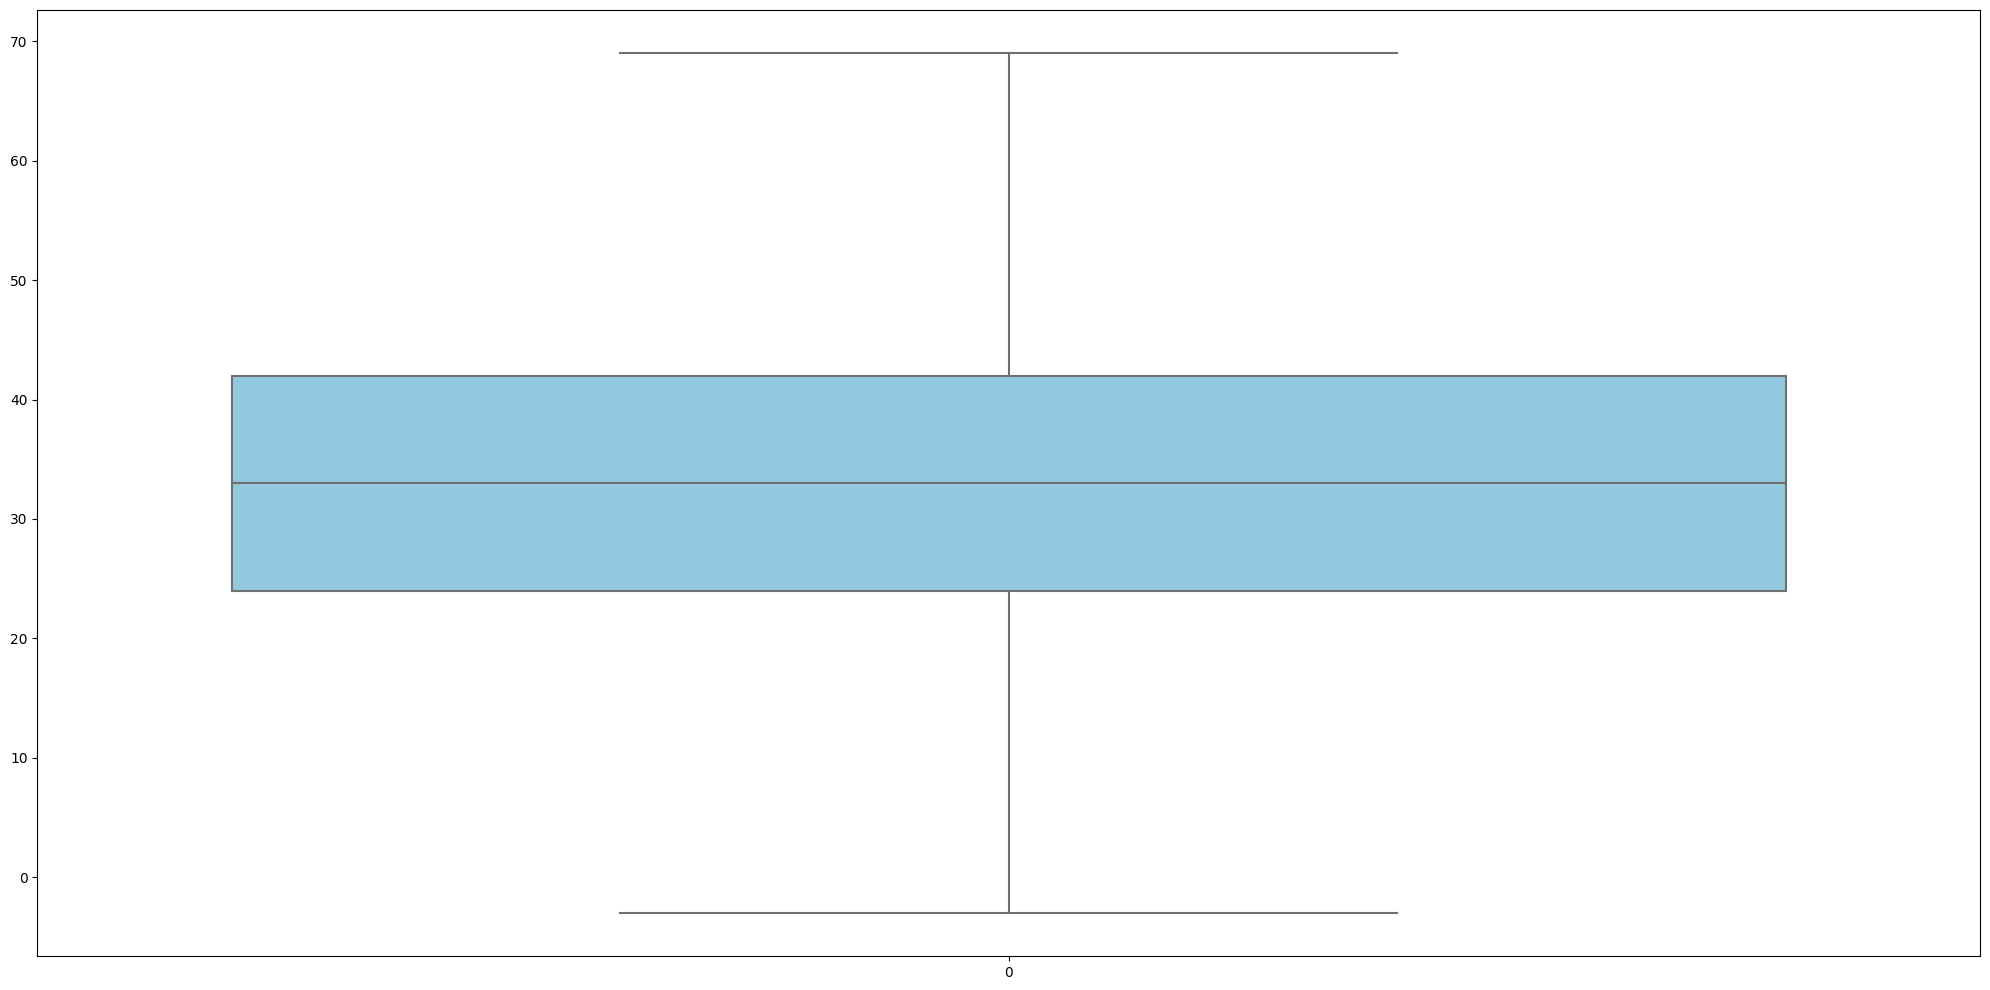

In [354]:
#Age
column_name = 'Age'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Trailing & leading _ are removed

Datatype of Annual_Income is changed to <class 'float'>
19457.5
72790.92
53333.42

Sebelum diisi: 0

Sesudah diisi: 0
0        0.830797
1        0.830797
2        0.830797
3        0.830797
4        0.830797
           ...   
99995    0.300487
99996    0.300487
99997    0.300487
99998    0.300487
99999    0.300487
Name: Annual_Income, Length: 100000, dtype: float64


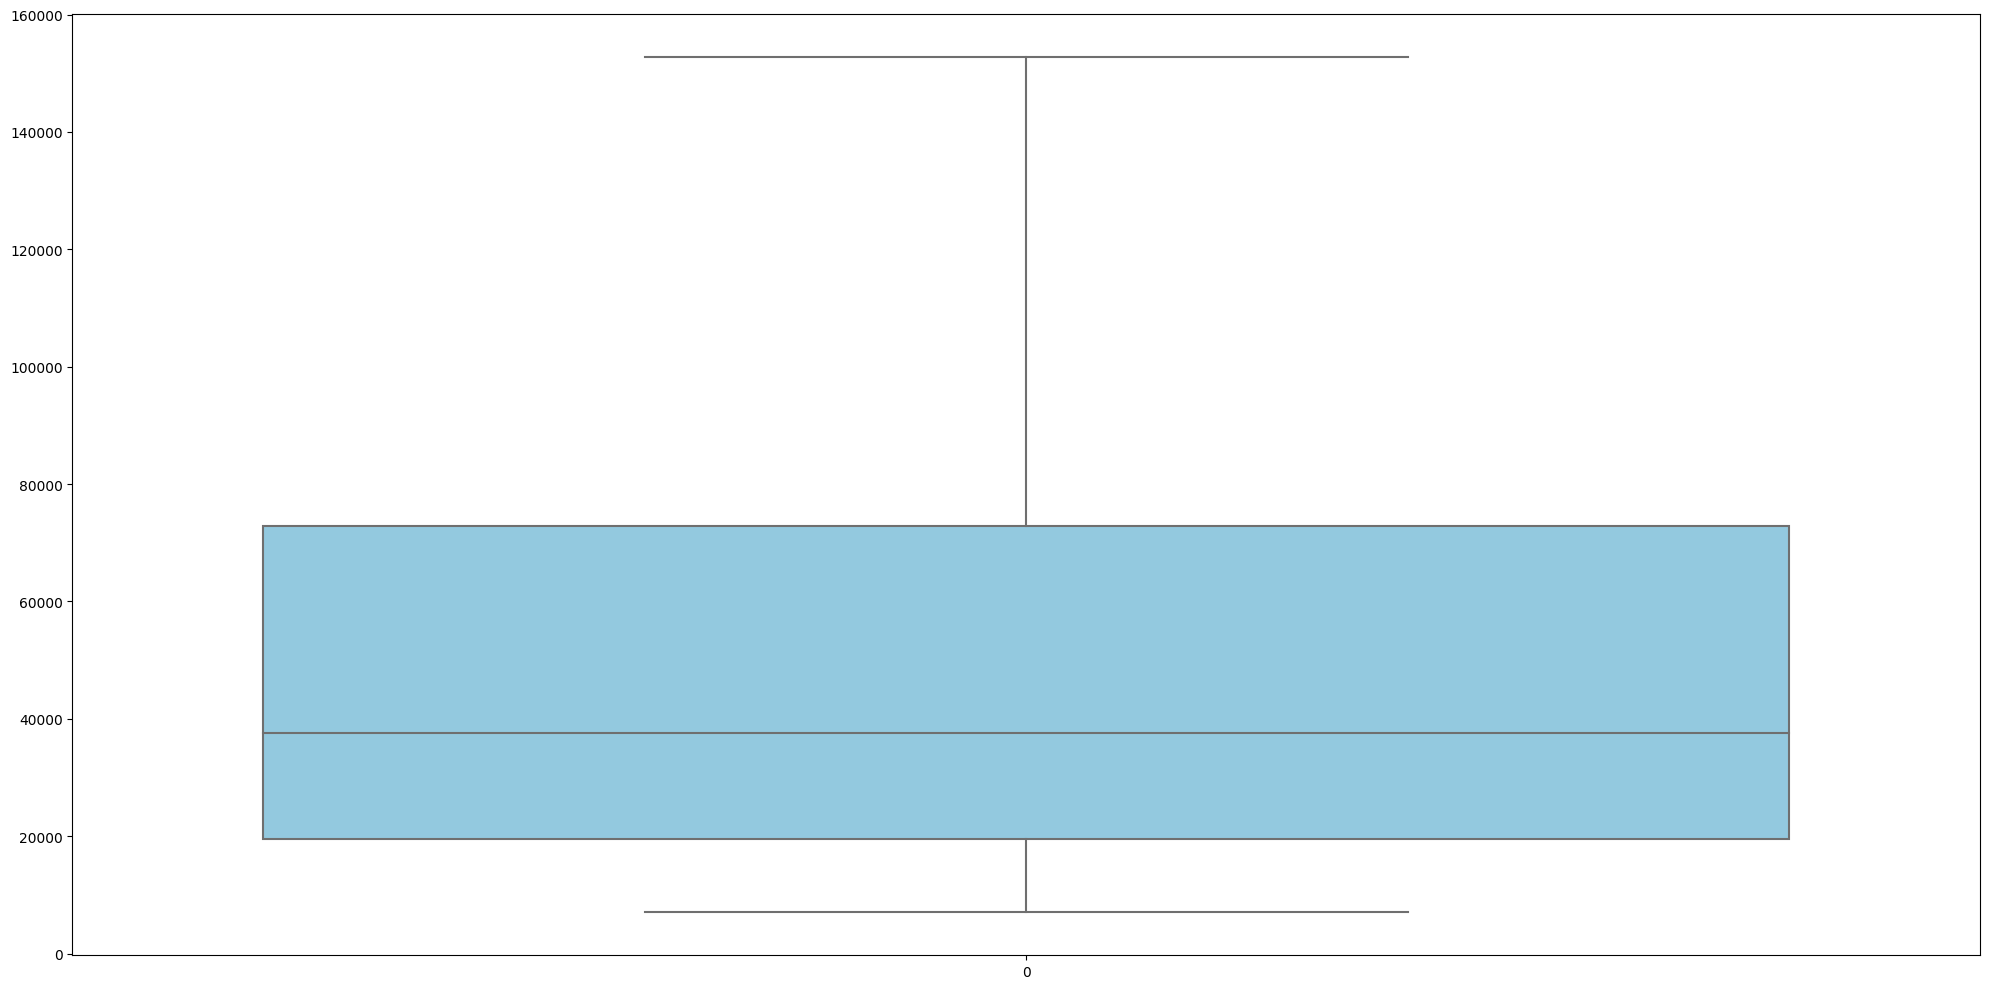

In [355]:
#multicolinear
#Annual Income
column_name = 'Annual_Income'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Monthly_Inhand_Salary is changed to <class 'float'>
1625.5682291666667
5957.448333333334
4331.880104166667

Sebelum diisi: 15002

Sesudah diisi: 0
0        0.818217
1        0.026003
2        0.026003
3        0.026003
4        0.818217
           ...   
99995    0.282184
99996    0.282184
99997    0.282184
99998    0.282184
99999    0.282184
Name: Monthly_Inhand_Salary, Length: 100000, dtype: float64


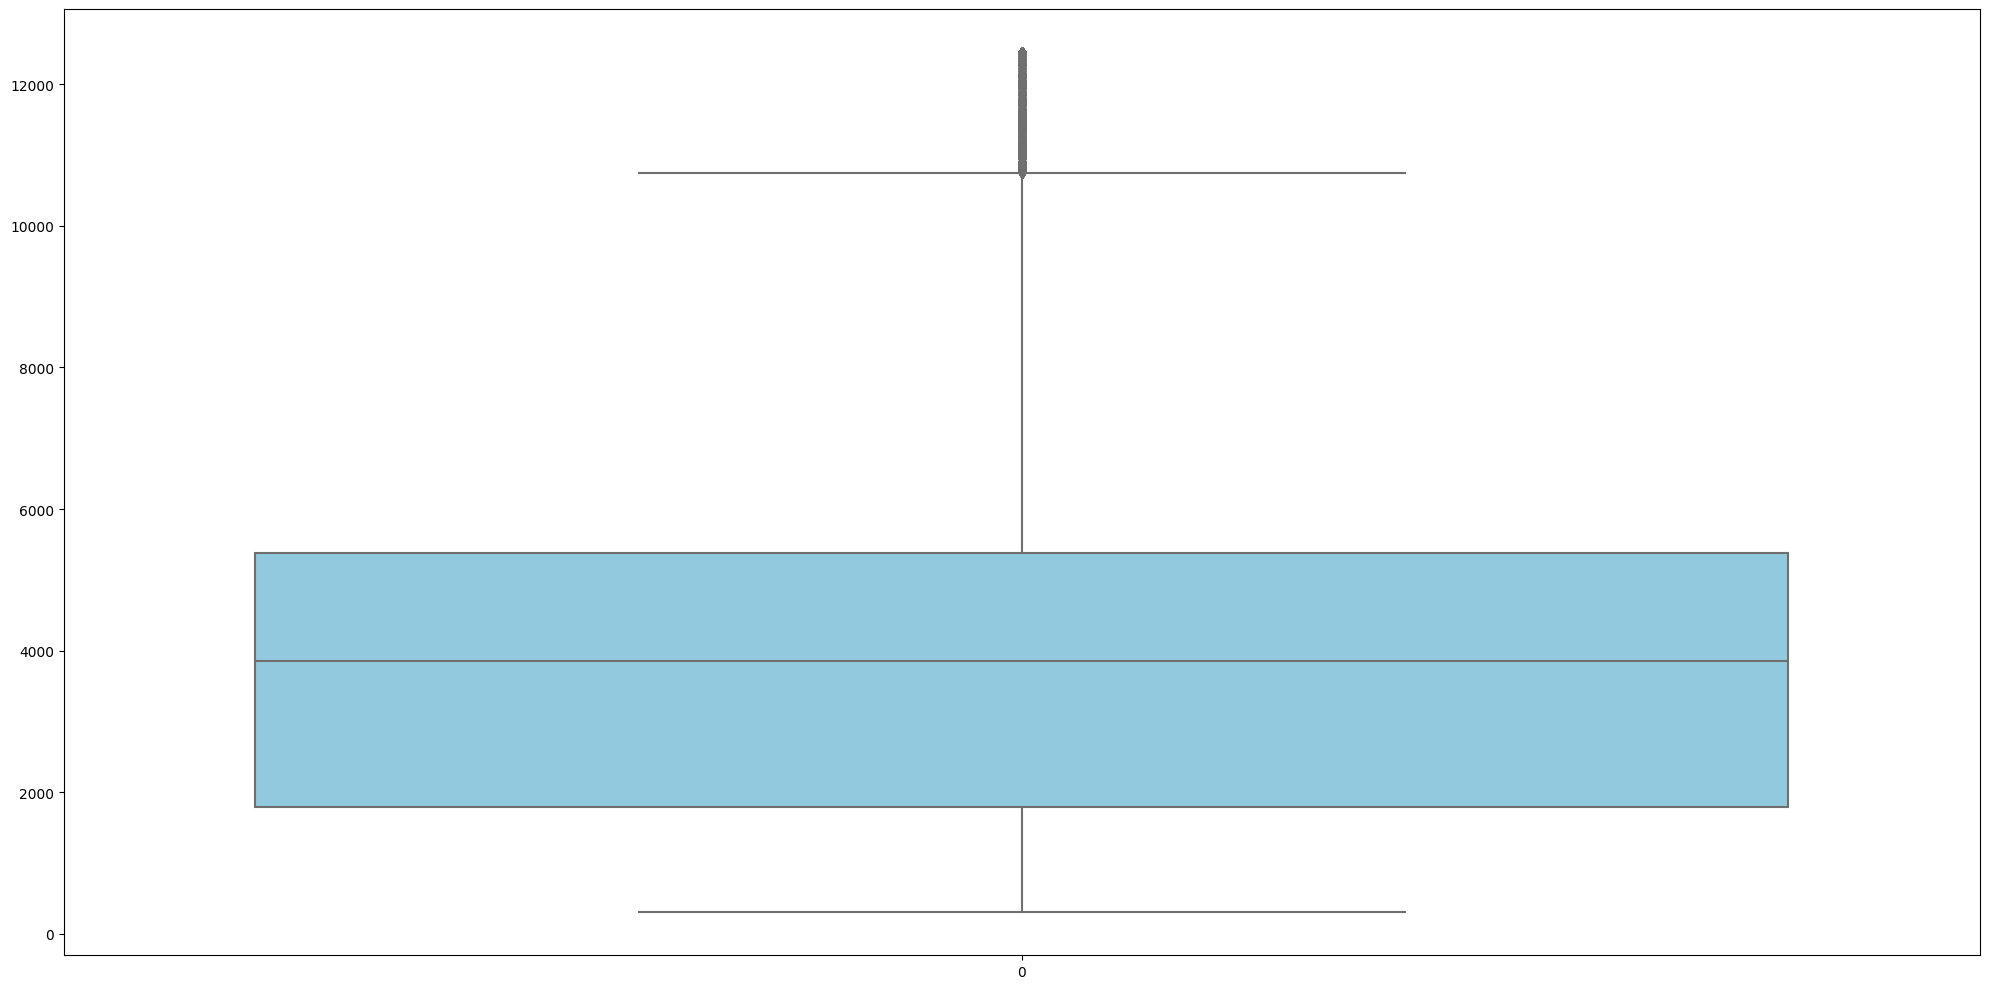

In [356]:
#multicolinear
#Monthly_Inhand_Salary
column_name = 'Monthly_Inhand_Salary'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Num_Bank_Accounts is changed to <class 'int'>
3.0
7.0
4.0

Sebelum diisi: 0

Sesudah diisi: 0
0        0.907532
1        0.907532
2        0.907532
3        0.907532
4        0.907532
           ...   
99995    0.539811
99996    0.539811
99997    0.539811
99998    0.539811
99999    0.539811
Name: Num_Bank_Accounts, Length: 100000, dtype: float64


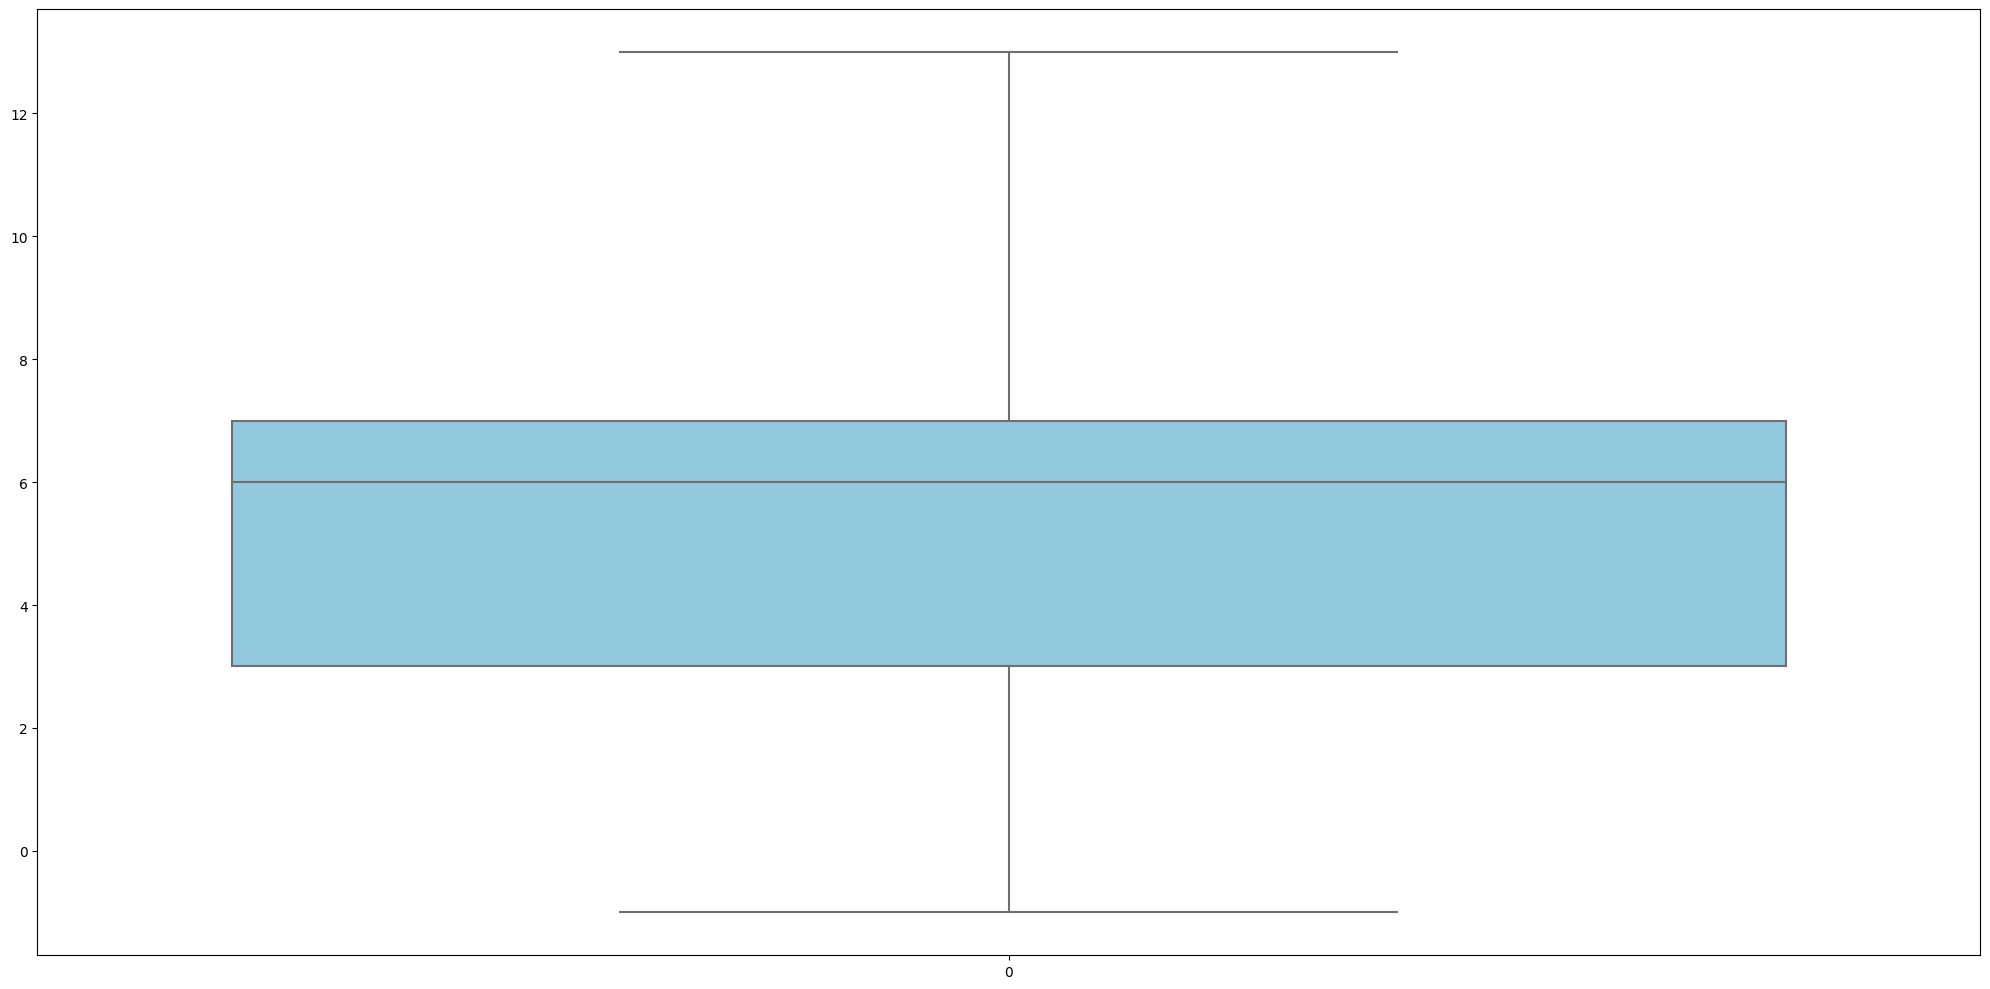

In [357]:
#Num_Bank_Accounts
column_name = 'Num_Bank_Accounts'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Num_Credit_Card is changed to <class 'int'>
4.0
7.0
3.0

Sebelum diisi: 0

Sesudah diisi: 0
0        0.748691
1        0.748691
2        0.748691
3        0.748691
4        0.748691
           ...   
99995    0.148576
99996    0.148576
99997    0.148576
99998    0.148576
99999    0.148576
Name: Num_Credit_Card, Length: 100000, dtype: float64


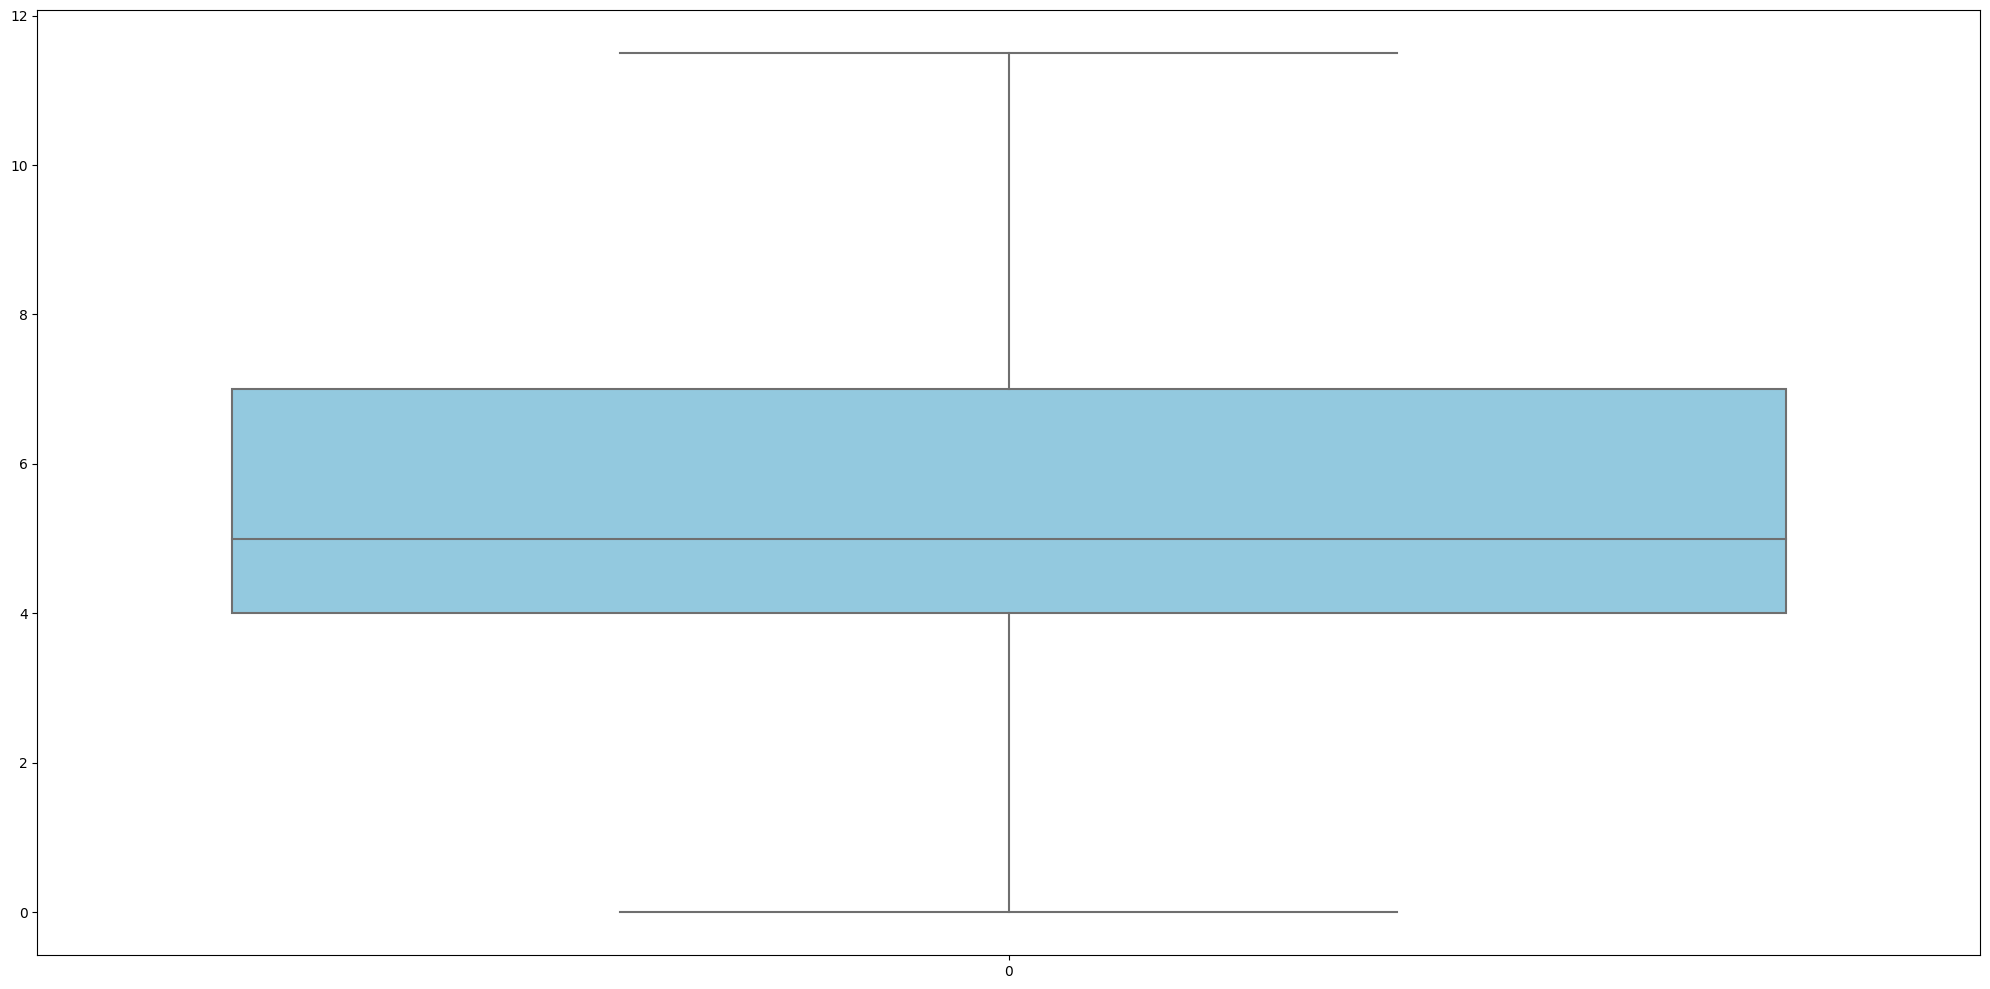

In [358]:
#Num_Credit_Card
column_name = 'Num_Credit_Card'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Interest_Rate is changed to <class 'int'>
8.0
20.0
12.0

Sebelum diisi: 0

Sesudah diisi: 0
0        1.296440
1        1.296440
2        1.296440
3        1.296440
4        1.296440
           ...   
99995    0.864616
99996    0.864616
99997    2.482026
99998    0.864616
99999    0.864616
Name: Interest_Rate, Length: 100000, dtype: float64


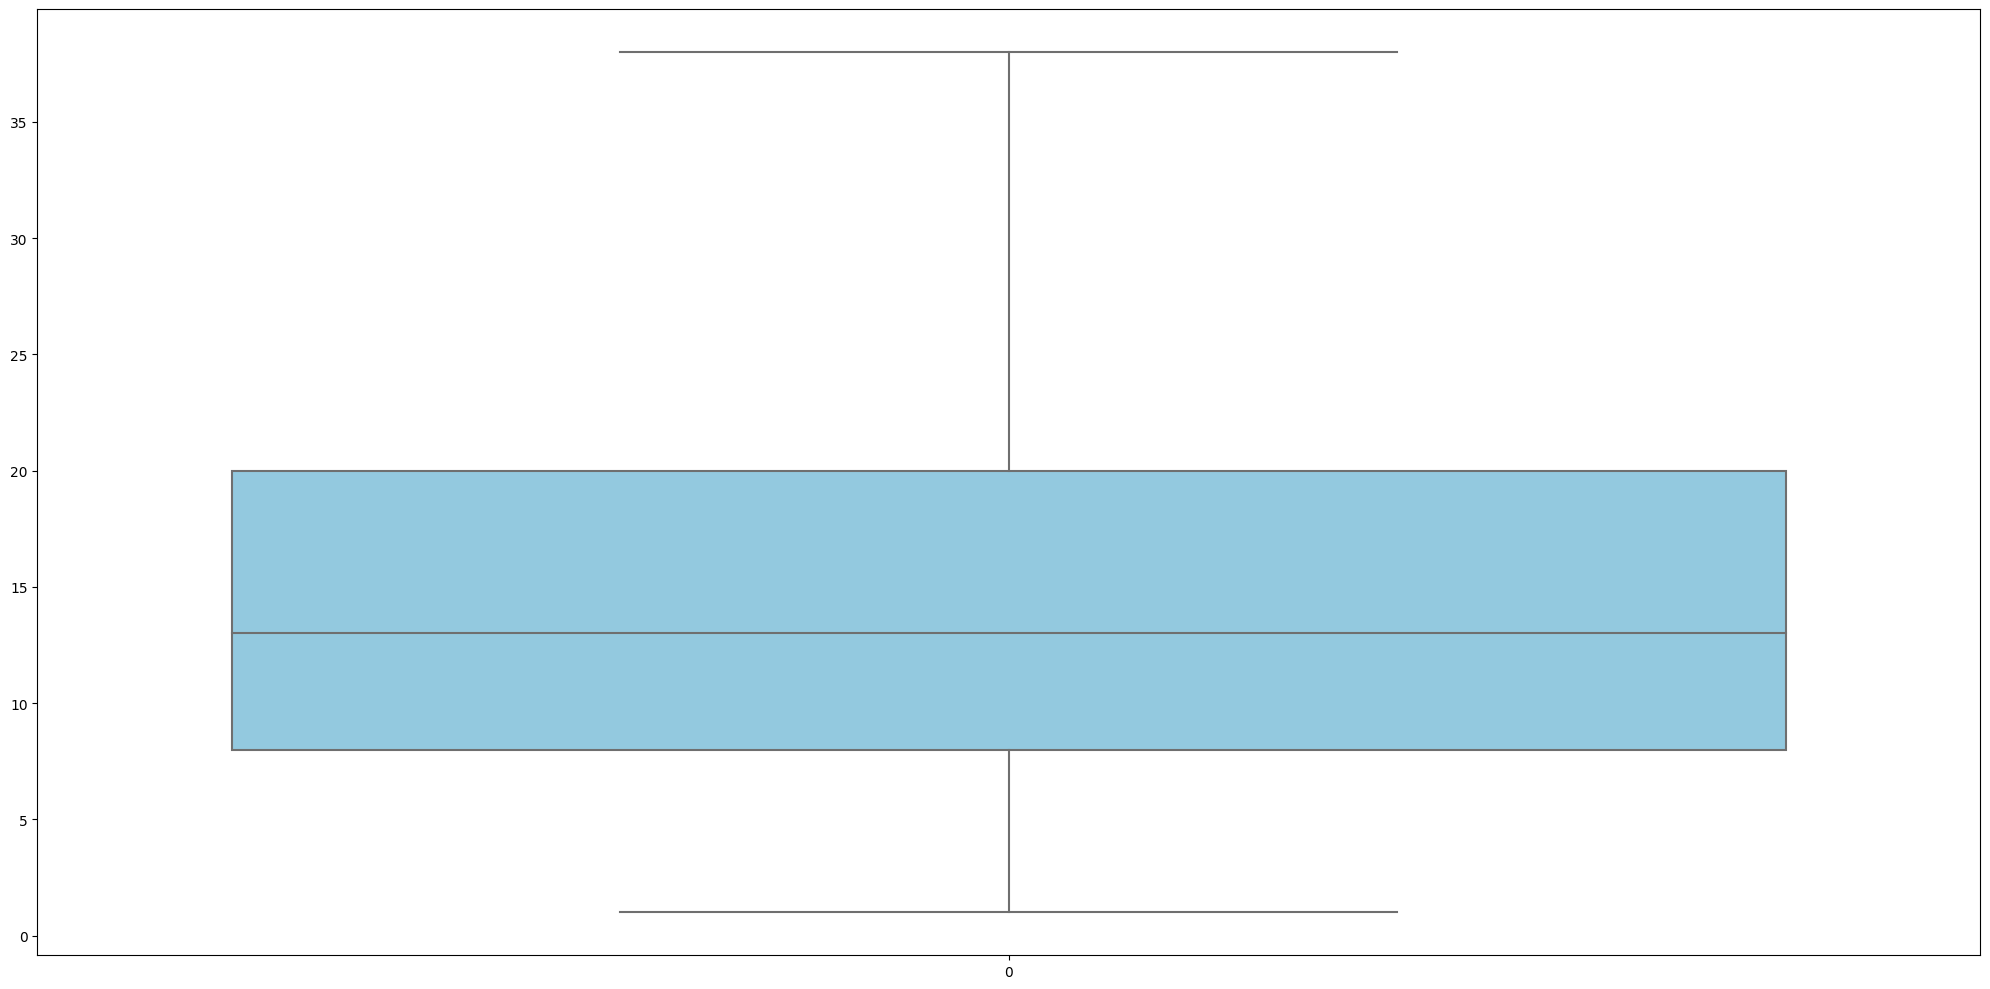

In [359]:
#Interest_Rate
column_name = 'Interest_Rate'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Trailing & leading _ are removed

Datatype of Num_of_Loan is changed to <class 'int'>
1.0
5.0
4.0

Sebelum diisi: 0

Sesudah diisi: 0
0        0.257860
1        0.257860
2        0.257860
3        0.257860
4        0.257860
           ...   
99995    0.419142
99996    0.419142
99997    0.419142
99998    0.419142
99999    0.419142
Name: Num_of_Loan, Length: 100000, dtype: float64


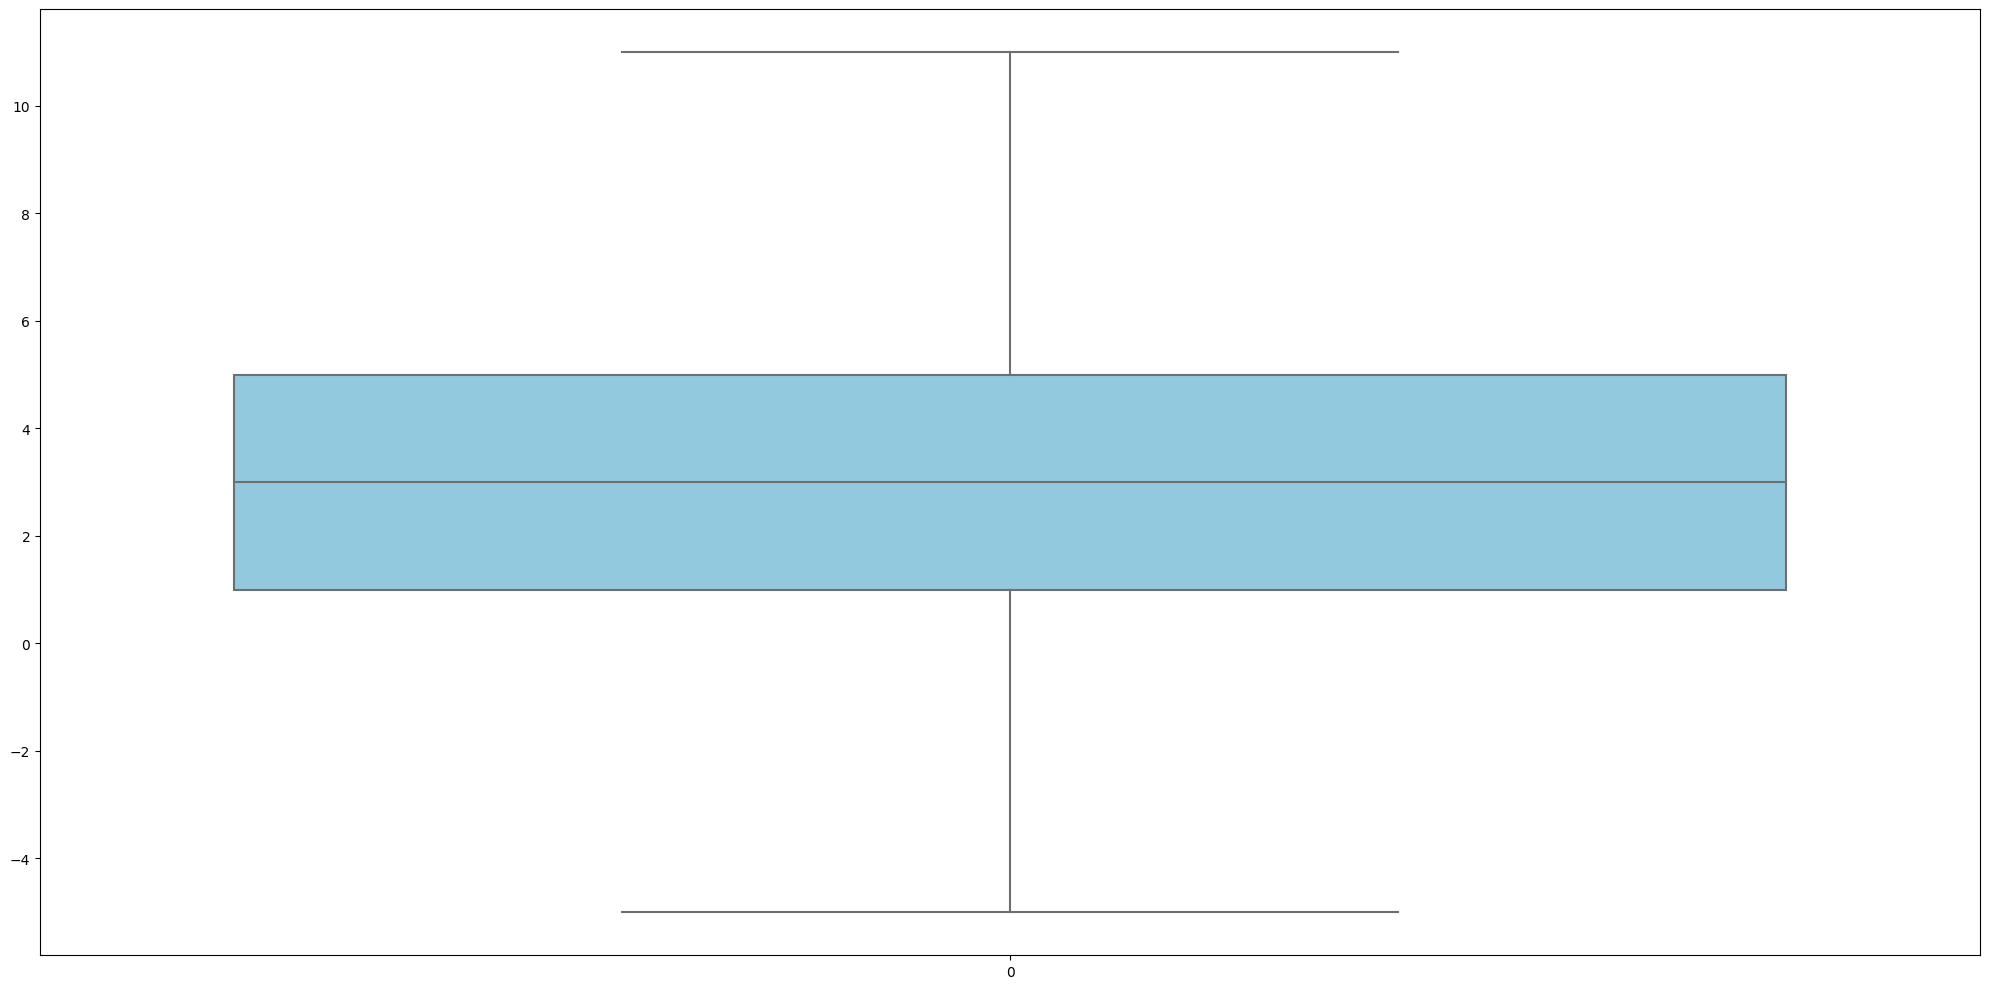

In [360]:
#Num_of_Loan
column_name = 'Num_of_Loan'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Delay_from_due_date is changed to <class 'int'>
10.0
28.0
18.0

Sebelum diisi: 0

Sesudah diisi: 0
0        1.240483
1        1.517738
2        1.240483
3        1.101856
4        1.032542
           ...   
99995    0.145792
99996    0.200777
99997    0.423047
99998    0.062149
99999    0.200777
Name: Delay_from_due_date, Length: 100000, dtype: float64


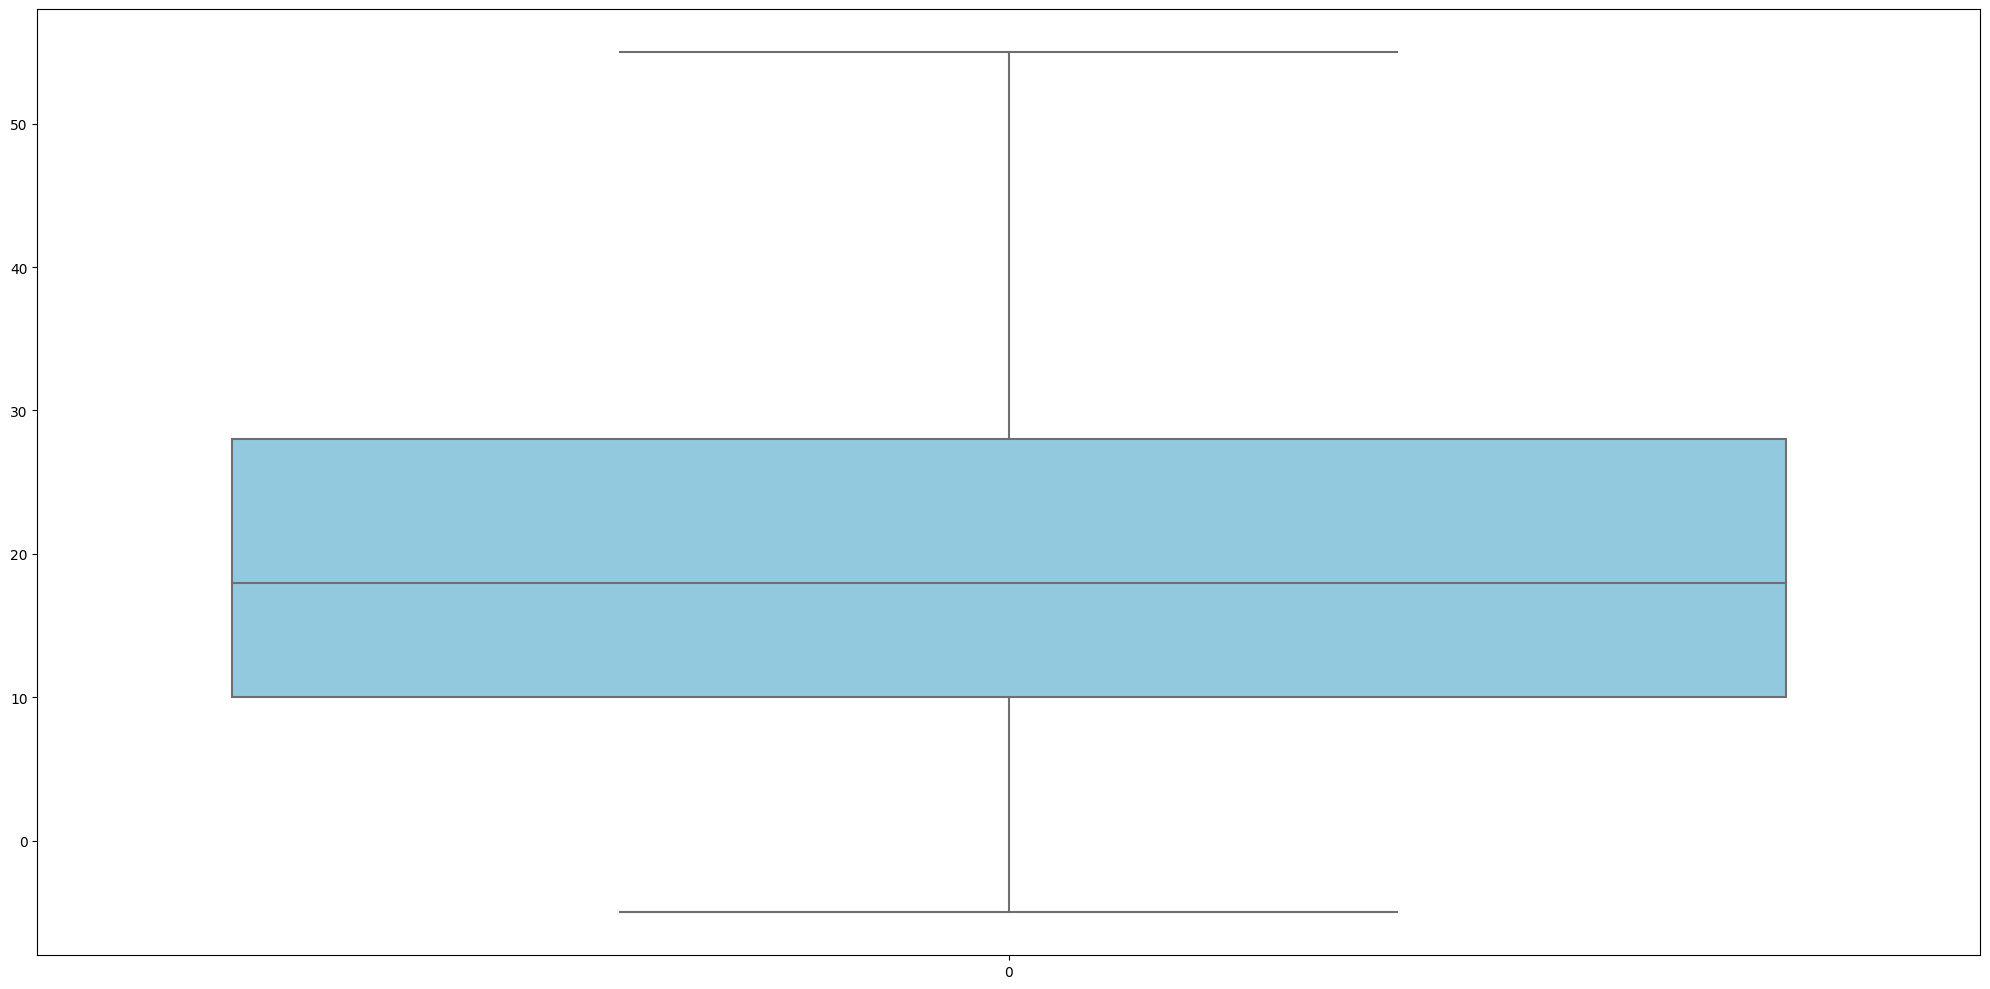

In [361]:
#Delay_from_due_date
column_name = 'Delay_from_due_date'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Trailing & leading _ are removed

Datatype of Num_of_Delayed_Payment is changed to <class 'float'>
9.0
18.0
9.0

Sebelum diisi: 7002

Sesudah diisi: 0
0        1.031875
1        0.034880
2        1.031875
3        1.511192
4        0.034880
           ...   
99995    1.031875
99996    1.031875
99997    1.191647
99998    0.010093
99999    1.191647
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64


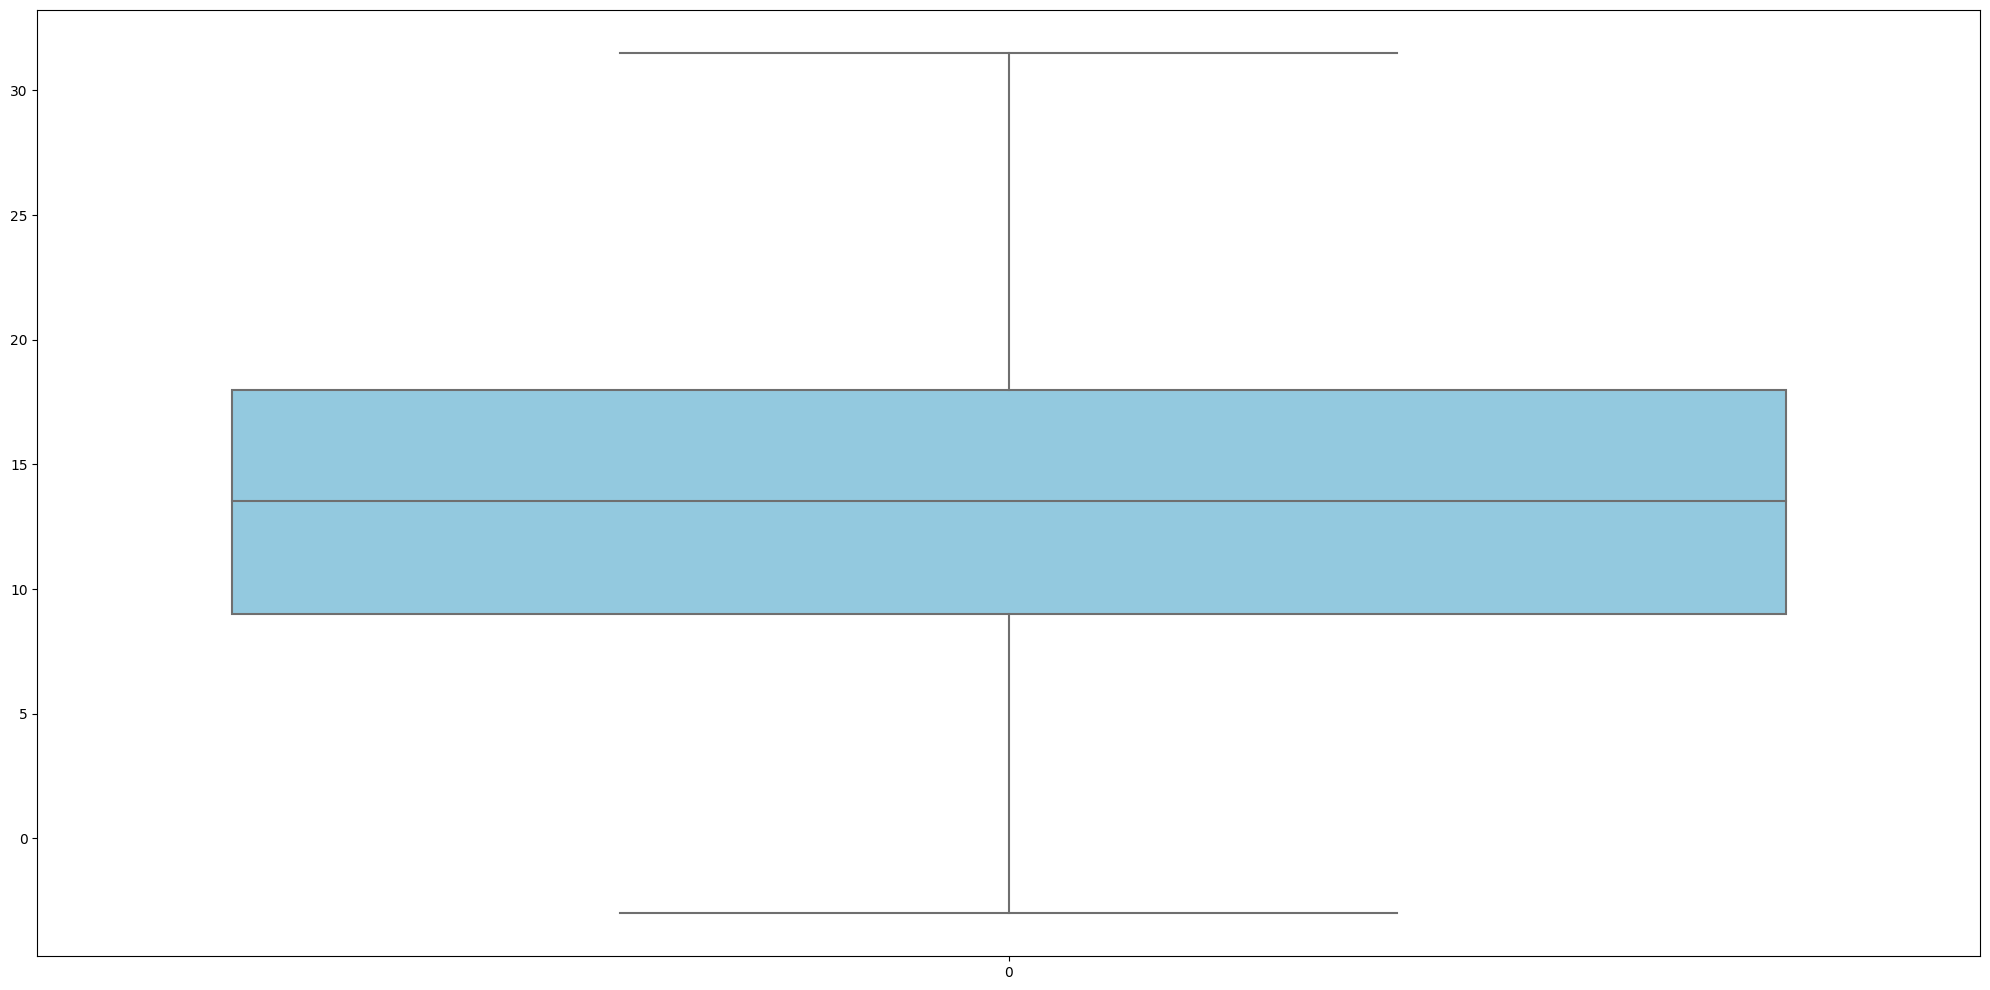

In [362]:
#Num_of_Delayed_Payment
column_name = 'Num_of_Delayed_Payment'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Sampah _ is replaced with Blank

Datatype of Changed_Credit_Limit is changed to float
5.32
14.87
9.549999999999999

Sebelum diisi: 2091

Sesudah diisi: 0
0        0.133135
1        0.133135
2        0.027205
3        0.614324
4        0.133135
           ...   
99995    0.167518
99996    0.167518
99997    0.167518
99998    0.167518
99999    0.167518
Name: Changed_Credit_Limit, Length: 100000, dtype: float64


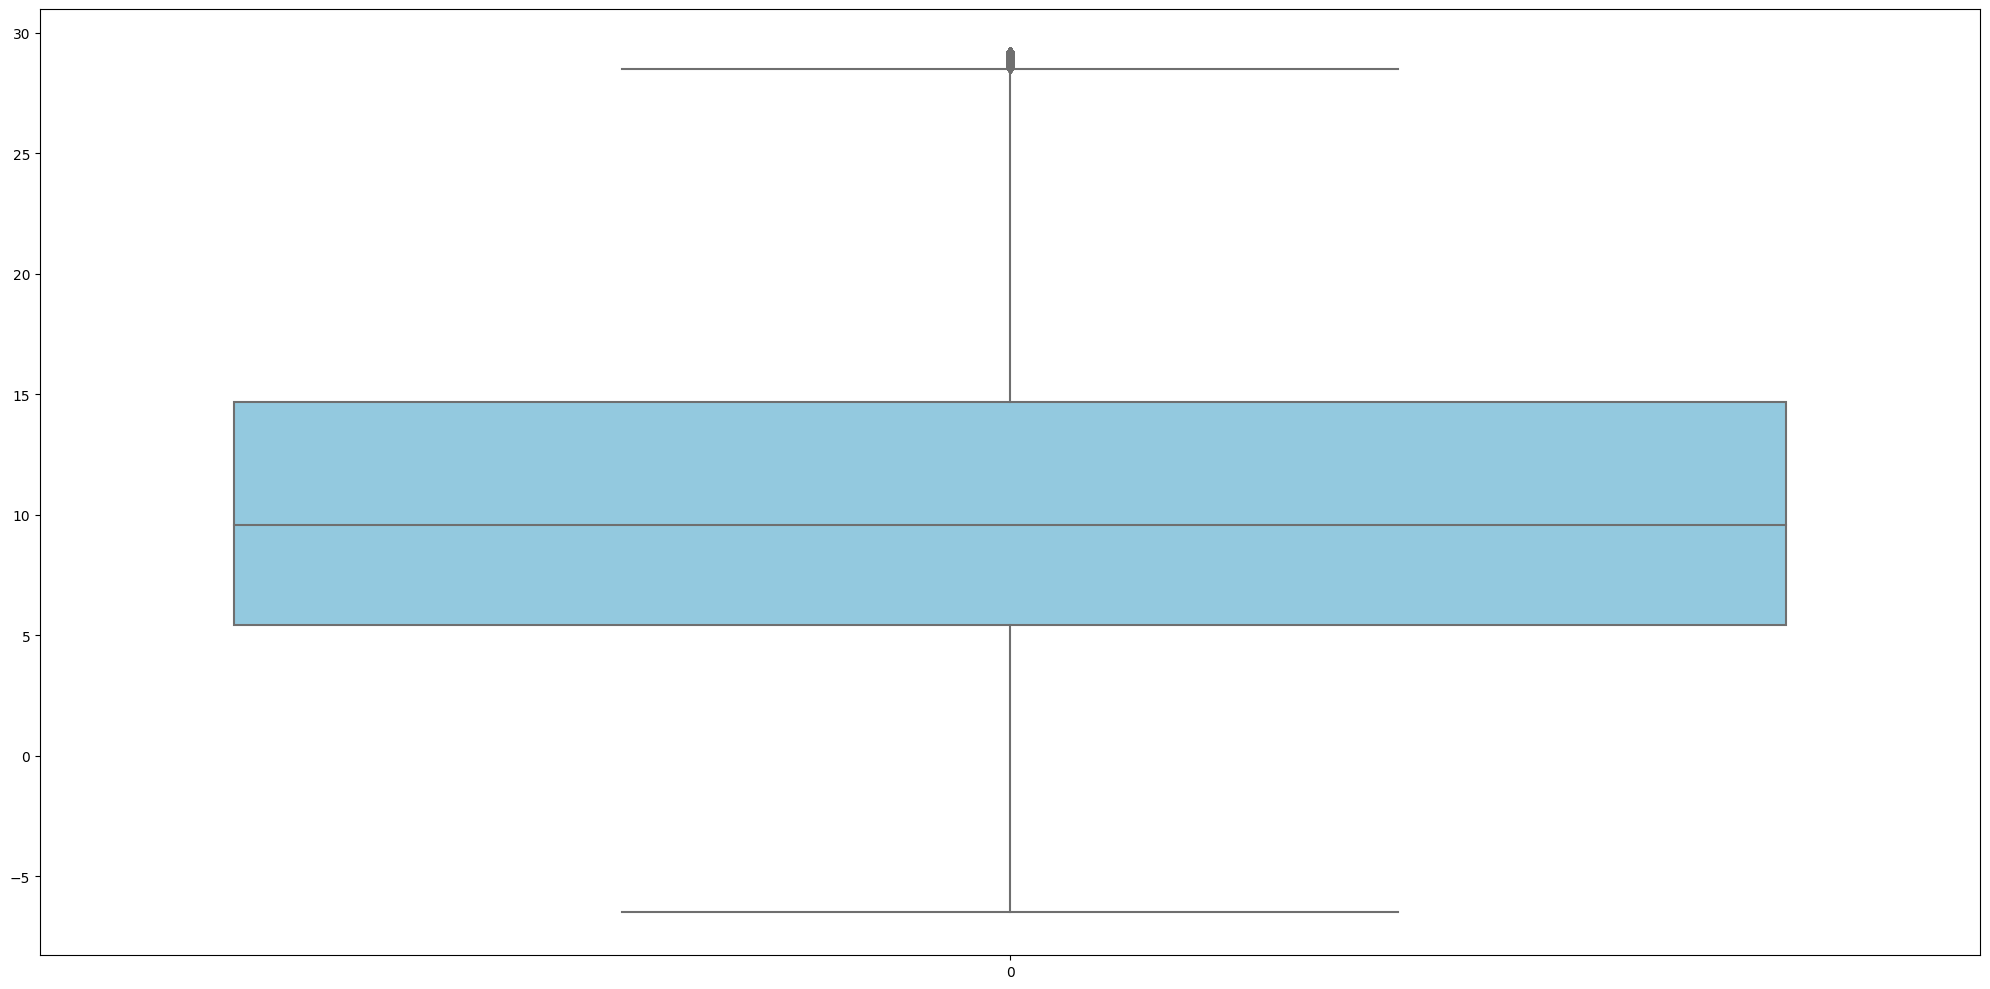

In [363]:
#Changed_Credit_Limit
column_name = 'Changed_Credit_Limit'
sampah = '_'
regex(df_train, column_name, sampah)
df_train['Changed_Credit_Limit']=pd.to_numeric(df_train['Changed_Credit_Limit'], errors='coerce')
num_process(df_train, column_name,  strip='_',datatype='float')
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Num_Credit_Inquiries is changed to <class 'float'>
3.0
9.0
6.0

Sebelum diisi: 1965

Sesudah diisi: 0
0        0.484889
1        0.484889
2        0.484889
3        0.484889
4        0.484889
           ...   
99995    0.728948
99996    0.728948
99997    0.728948
99998    0.728948
99999    0.728948
Name: Num_Credit_Inquiries, Length: 100000, dtype: float64


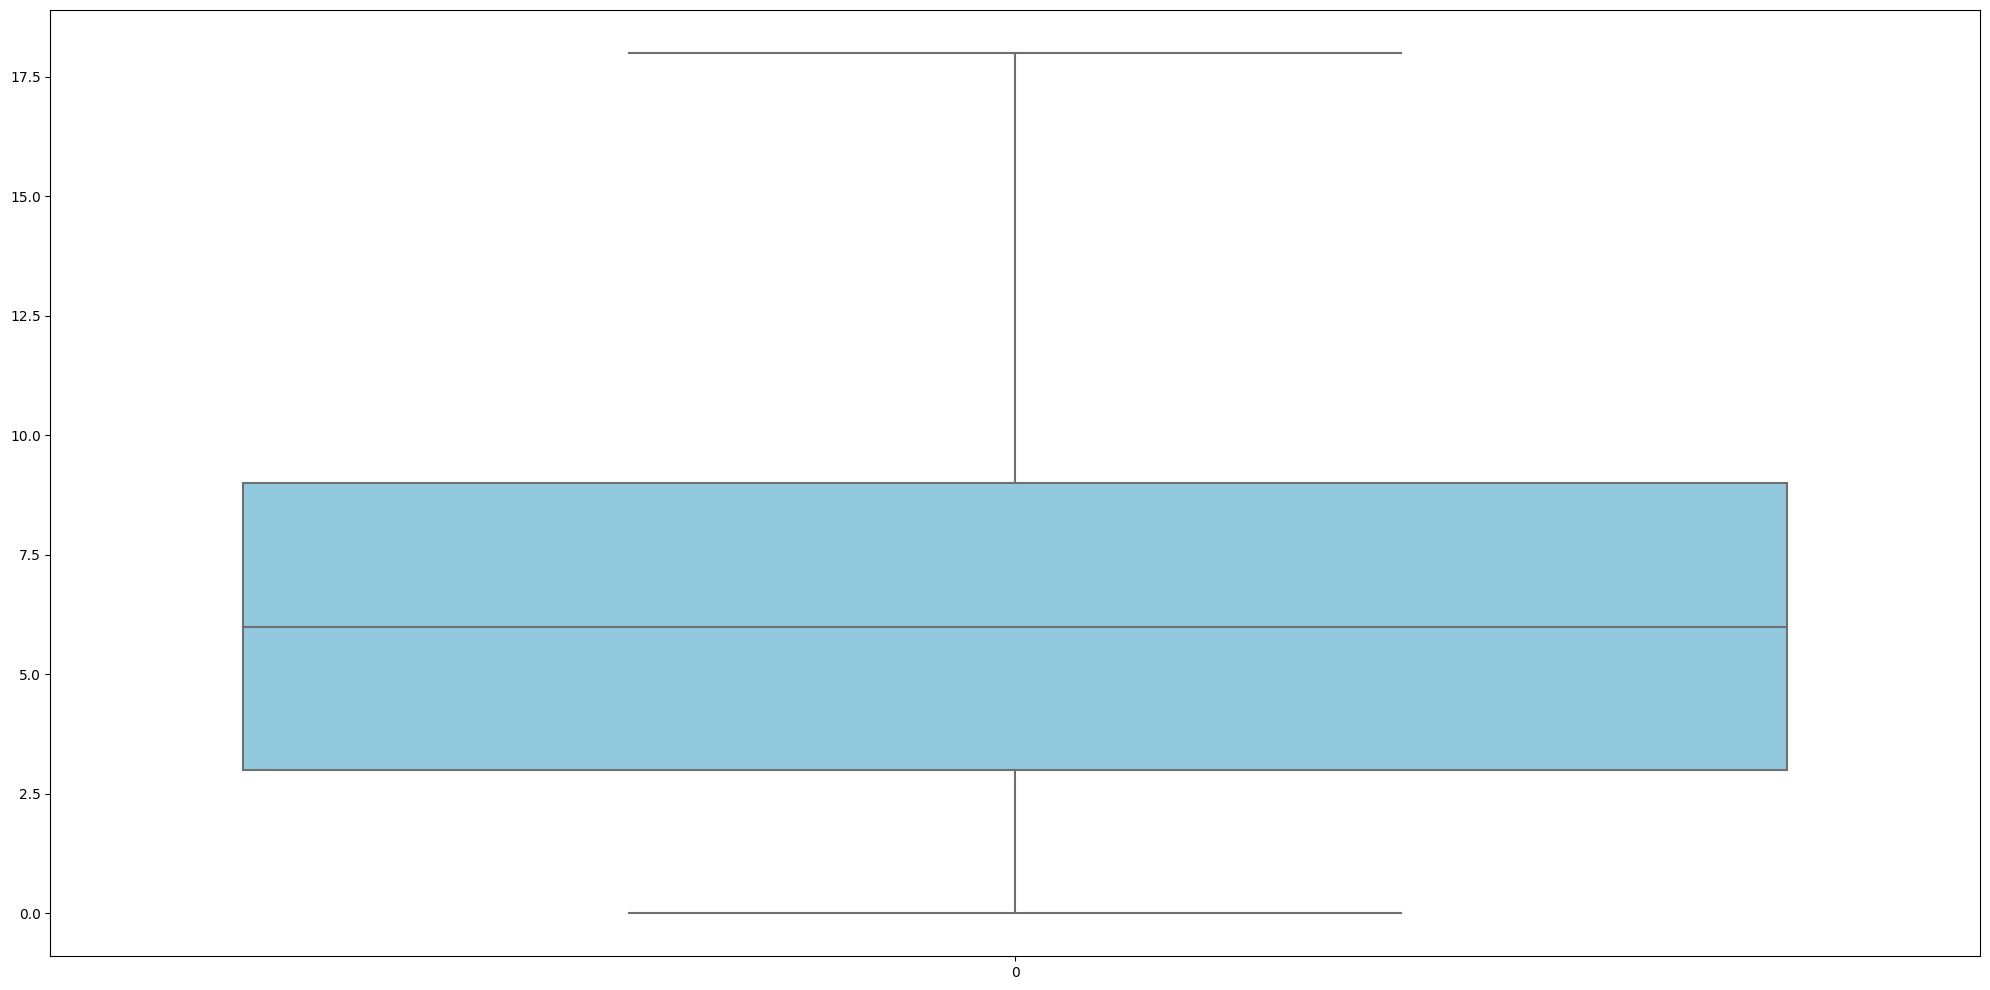

In [364]:
#Num_Credit_Inquiries
column_name = 'Num_Credit_Inquiries'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Trailing & leading _ are removed

Datatype of Outstanding_Debt is changed to <class 'float'>
566.0725
1945.9625
1379.89

Sebelum diisi: 0

Sesudah diisi: 0
0        0.543073
1        0.543073
2        0.543073
3        0.543073
4        0.543073
           ...   
99995    0.826266
99996    0.826266
99997    0.826266
99998    0.826266
99999    0.826266
Name: Outstanding_Debt, Length: 100000, dtype: float64


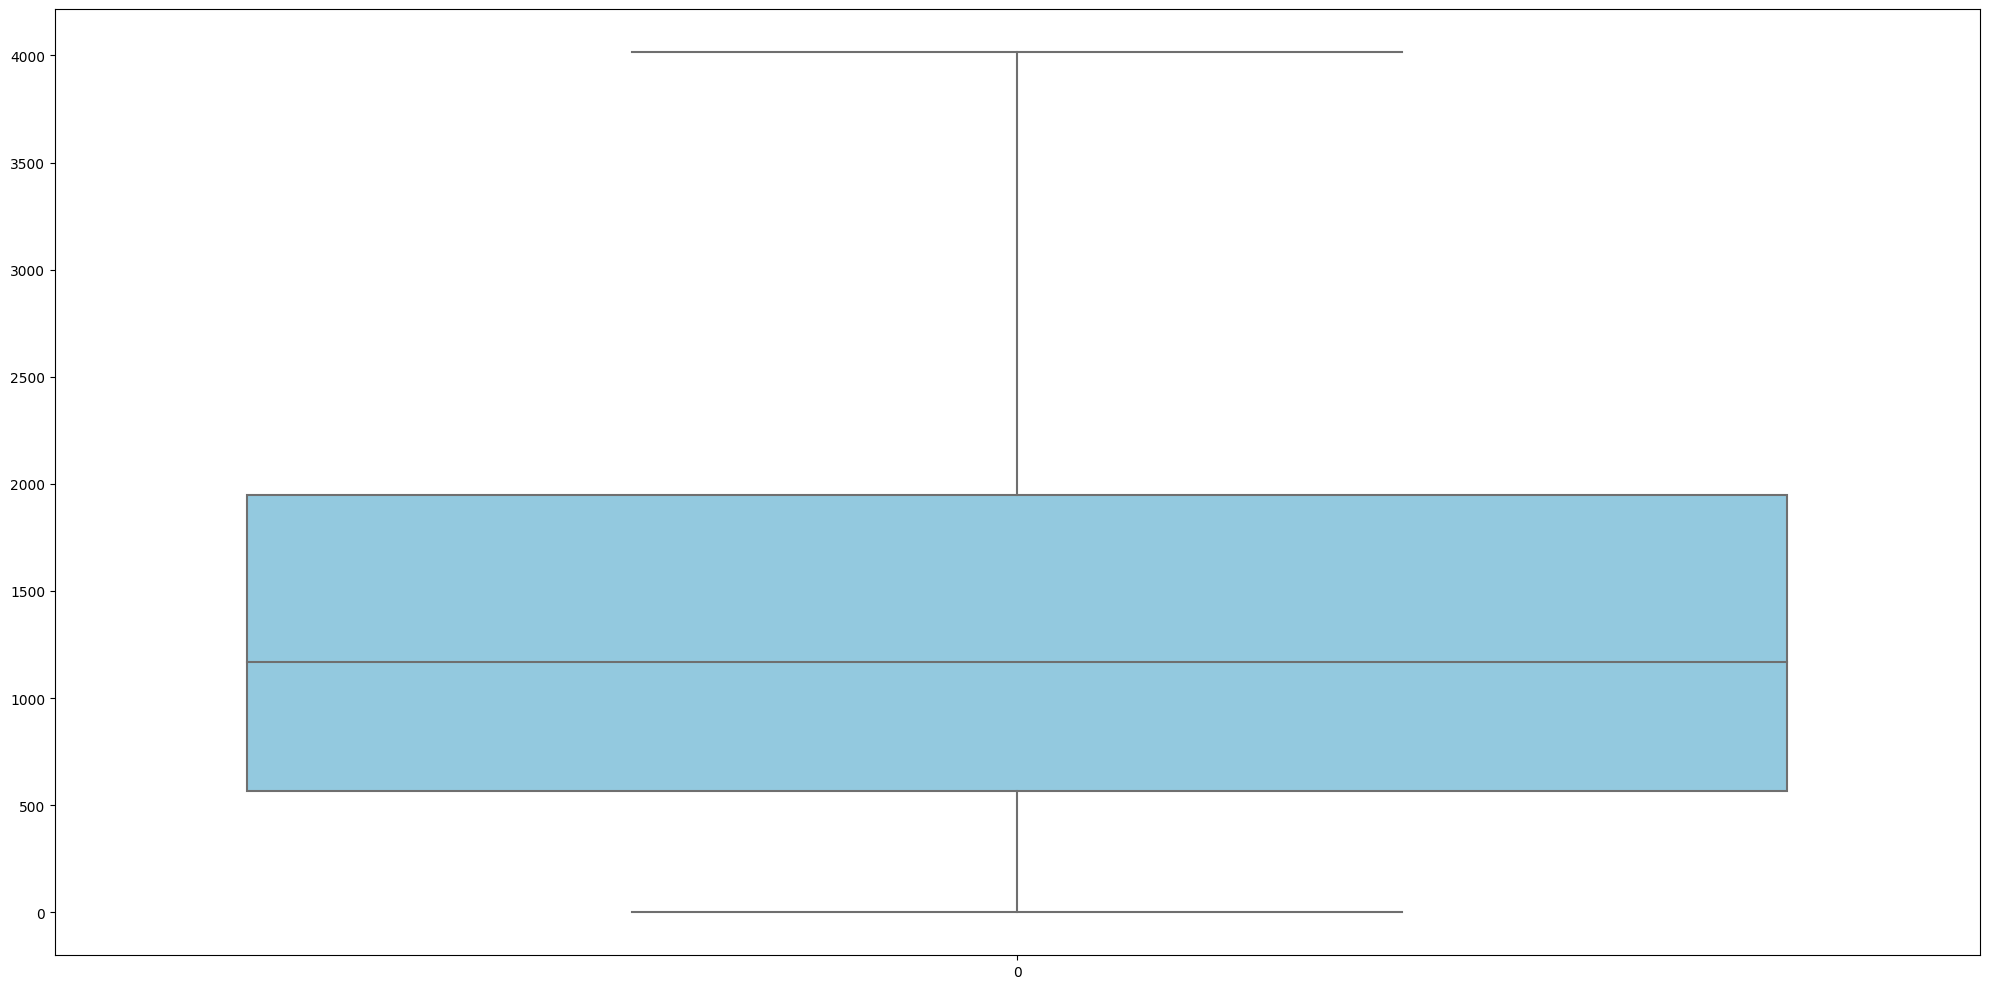

In [365]:
#Outstanding_Debt
column_name = 'Outstanding_Debt'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Credit_Utilization_Ratio is changed to <class 'float'>
28.05256656125577
36.4966630559621
8.444096494706333

Sebelum diisi: 0

Sesudah diisi: 0
0        1.067570
1        0.066486
2        0.718380
3        0.177317
4        1.463379
           ...   
99995    0.464826
99996    1.618294
99997    1.753123
99998    0.264434
99999    0.372754
Name: Credit_Utilization_Ratio, Length: 100000, dtype: float64


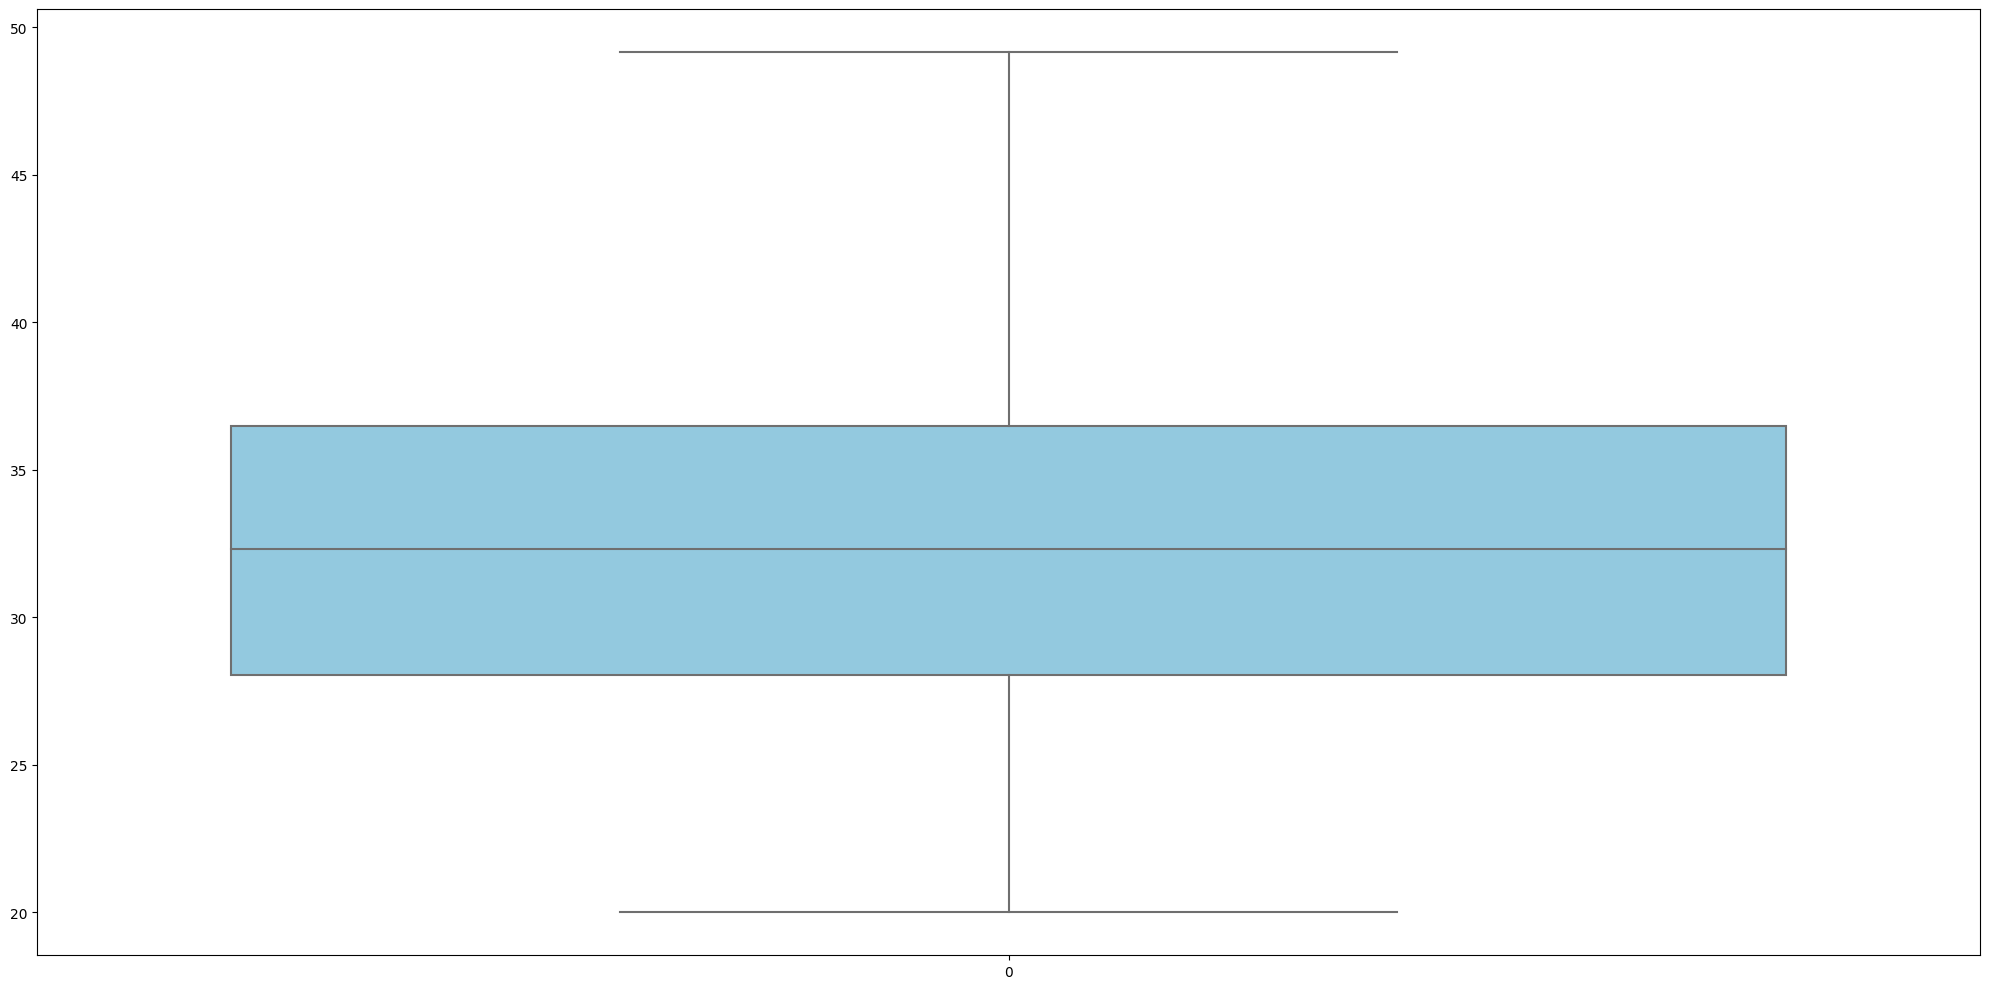

In [366]:
#Credit_Utilization_Ratio
column_name = 'Credit_Utilization_Ratio'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Total_EMI_per_month is changed to <class 'float'>
30.306660494686994
161.22424910969863
130.91758861501165

Sebelum diisi: 0

Sesudah diisi: 0
0        0.559441
1        0.559441
2        0.559441
3        0.559441
4        0.559441
           ...   
99995    0.697878
99996    0.697878
99997    0.697878
99998    0.697878
99999    0.697878
Name: Total_EMI_per_month, Length: 100000, dtype: float64


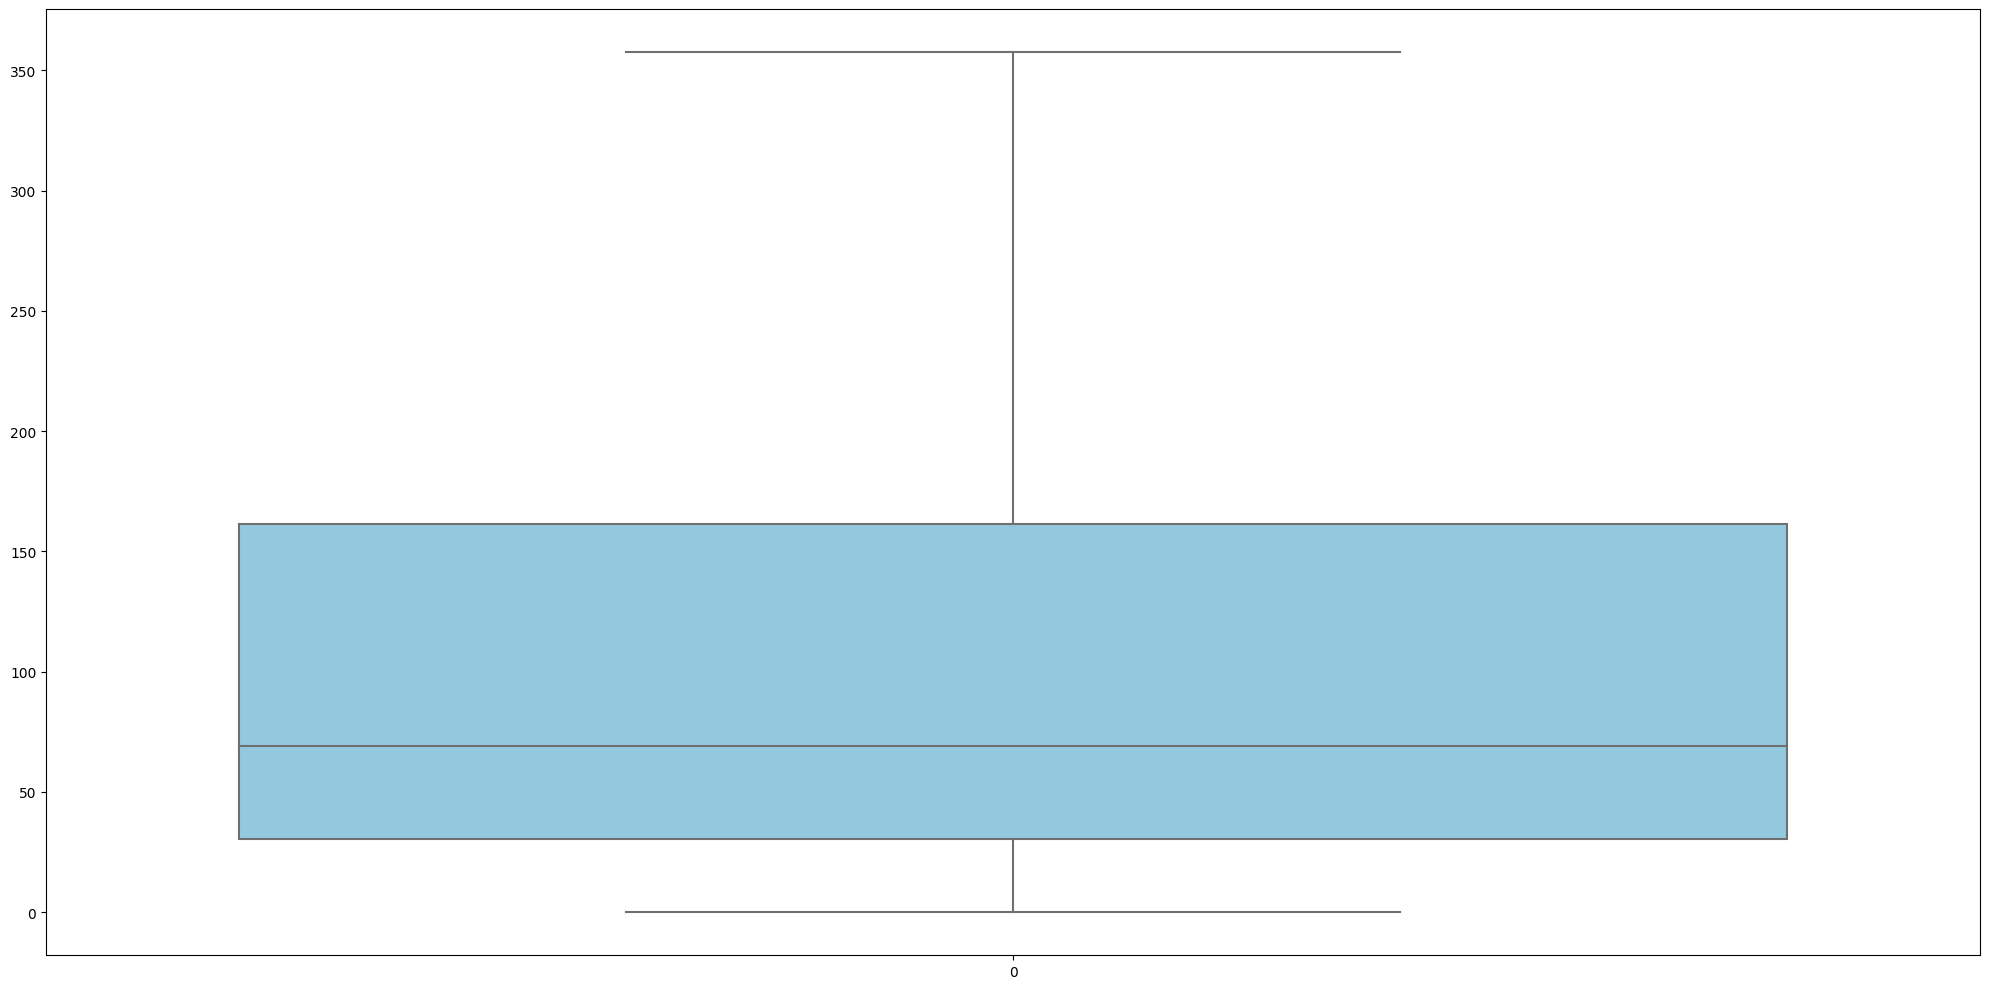

In [367]:
#Total_EMI_per_month
column_name = 'Total_EMI_per_month'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)

In [368]:
# #note : didrop karena outliers
# #Amount_invested_monthly
# column_name = 'Amount_invested_monthly'


# num_process(df_train, column_name, strip='_', datatype=float)
# fill_missing(df_train, column_name)
# plot(df_train, column_name)


Trailing & leading _ are removed

Datatype of Monthly_Balance is changed to <class 'float'>
269.9857937858471
469.64048738391693
199.65469359806985

Sebelum diisi: 2868

Sesudah diisi: 0
0        0.437412
1        0.599115
2        0.328802
3        0.954137
4        0.269150
           ...   
99995    0.021470
99996    0.021470
99997    0.021470
99998    0.021470
99999    0.021470
Name: Monthly_Balance, Length: 100000, dtype: float64


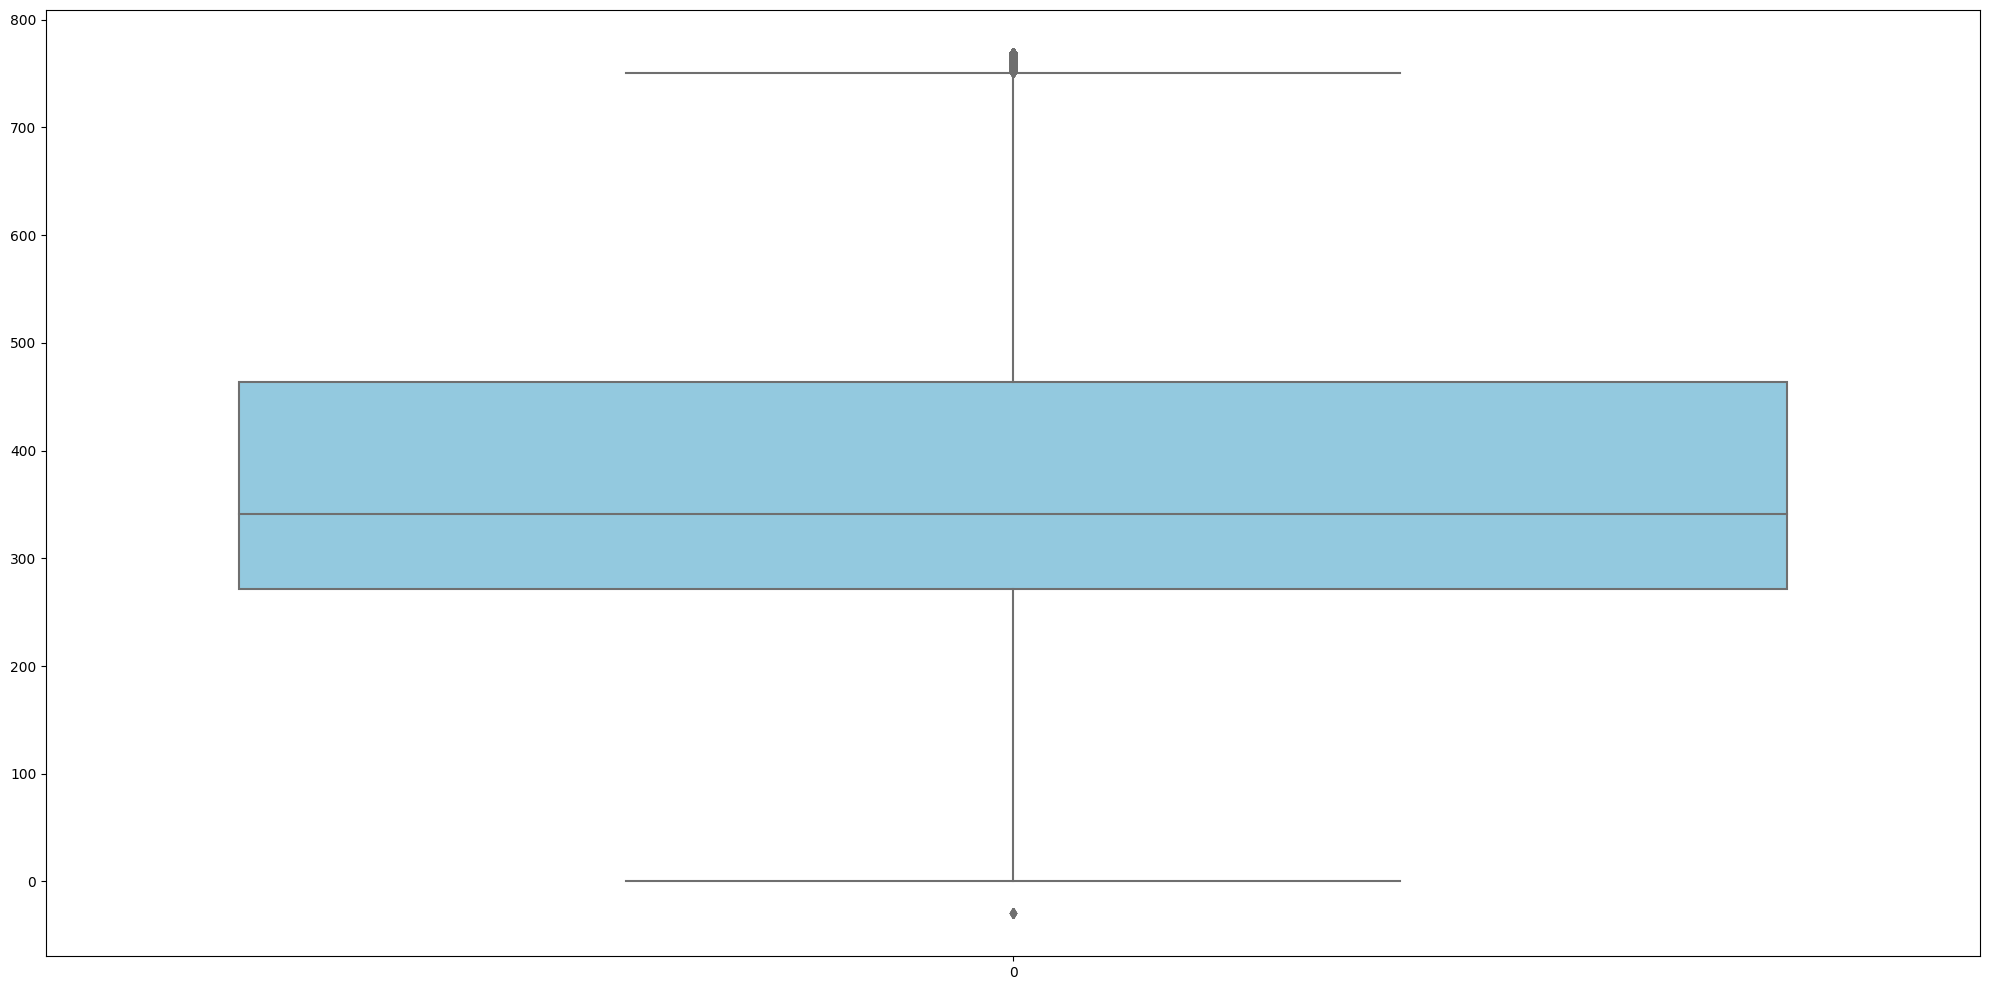

In [369]:
#Monthly_Balance
column_name = 'Monthly_Balance'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)

In [370]:
# def reduce_pca(df):
#     pca=PCA(n_components=0.95)
#     numpy_arr=pca.fit_transform(df)
#     df_reduced=pd.DataFrame(data=numpy_arr.flatten())
#     return df_reduced
# reduce_pca(df_train)

#Multicolinearity

In [371]:
from sklearn.model_selection import train_test_split
feature = df_train.drop(columns='Credit_Score')
target = df_train[['Credit_Score']]

feature_cs_train, feature_cs_test, target_cs_train, target_cs_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [372]:
#pengecekan VIF (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X=add_constant(feature_cs_train)

vif_df=pd.DataFrame([vif(X.values, i)
                     for i in range(X.shape[1])],
                    index=X.columns).reset_index()
vif_df.columns=['feature','vif_score']
vif_df=vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Month,1.037886
2,Age,1.061939
3,Occupation,1.000686
4,Annual_Income,5.309452
5,Monthly_Inhand_Salary,4.709153
6,Num_Bank_Accounts,1.760938
7,Num_Credit_Card,1.387805
8,Interest_Rate,1.993306
9,Num_of_Loan,1.709189
10,Type_of_Loan,1.062172


In [373]:
# df_train.to_excel('creditscore_output.xlsx', engine='xlsxwriter')  

In [374]:
df_train.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [375]:
#Split Input & Output Data
X = df_train.drop('Credit_Score',axis=1)

In [376]:
#Normalize Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler2 = StandardScaler()
X = scaler2.fit_transform(X)

#Clustering

[1 1 1 ... 1 1 1]
Nilai Silhouette Score n_cluster=2 adalah = 0.18907932424378193
Nilai DBI =  1.8727174861986575
[1 1 1 ... 1 1 1]
Nilai Silhouette Score n_cluster=3 adalah = 0.14395305787455304
Nilai DBI =  2.211108751901507


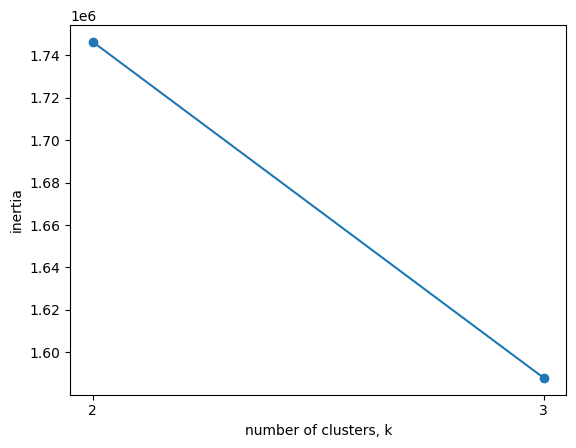

In [377]:
#kmeans clustering
# def kmeans_clustering(X):
inertia=[]
K=range(2,4)
for num_cluster in K:
    kmeans=KMeans(n_clusters=num_cluster, max_iter=50, init='k-means++',n_init=10, random_state=0, algorithm="elkan")
    kmeans.fit(X)
    kluster = kmeans.predict(X)
    inertia.append(kmeans.inertia_)
    s_score = silhouette_score(X, kluster)
    dbi = davies_bouldin_score(X, kluster)
    # label_0=X(kluster==0)
    # label_1=X(kluster==1)
    # label_2=X(kluster==2)
        
    print(kluster)
    # cols =filtered_label0.columns
    # plt.scatter(label_0[cols[0]], label_0[cols[1]], color='red' )
    # plt.scatter(label_1[cols[0]], label_1[cols[1]], color='black' )
        
    print("Nilai Silhouette Score n_cluster={0} adalah = {1}".format(num_cluster, s_score))
    print("Nilai DBI = ",dbi)
plt.plot(K, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(K)
plt.show()
# kmeans_clustering(X)

In [378]:
#AHC 
def ahc_clustering(X):
    K=range(2,4)
    for num_cluster in K:
        ahc=AgglomerativeClustering(n_clusters=num_cluster, linkage='single')
        ahc.fit(X)
        kluster = ahc.labels_
        
        s_score = silhouette_score(X, kluster)
        dbi = davies_bouldin_score(X, kluster)
        print("Nilai Silhouette Score n_cluster={0} adalah = {1}".format(num_cluster, s_score))
        print("Nilai DBI = ",dbi)
ahc_clustering(X)

Nilai Silhouette Score n_cluster=2 adalah = 0.16002816801372025
Nilai DBI =  0.7370993576253428
Nilai Silhouette Score n_cluster=3 adalah = 0.1500045983302255
Nilai DBI =  0.6991265826733066
